In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def parse_aggr_method(method):
    meta = 'Simple'
    if 'Negotiation' in method:
        meta = 'Simple Negotiation'
    if '(Mean-Weighted)' in method:
        meta = 'Mean Wgh Negotiation'
    if '(Weighted)' in method:
        meta = 'Weighted Negotiation'
    if 'Weighted Mean' in method:
        meta = 'Weighted Mean'
    return meta

def expand_confidence(method):
    conf = 'None'
    if '3x3 Conv' in method:
        conf = '3x3 Convolution'
    if '5x5 Conv' in method:
        conf = '5x5 Convolution'
    if 'Mean Entropy' in method:
        conf = 'Image Mean'
    if 'Pixelwise Entropy' in method:
        conf = 'Pixelwise'
    return conf

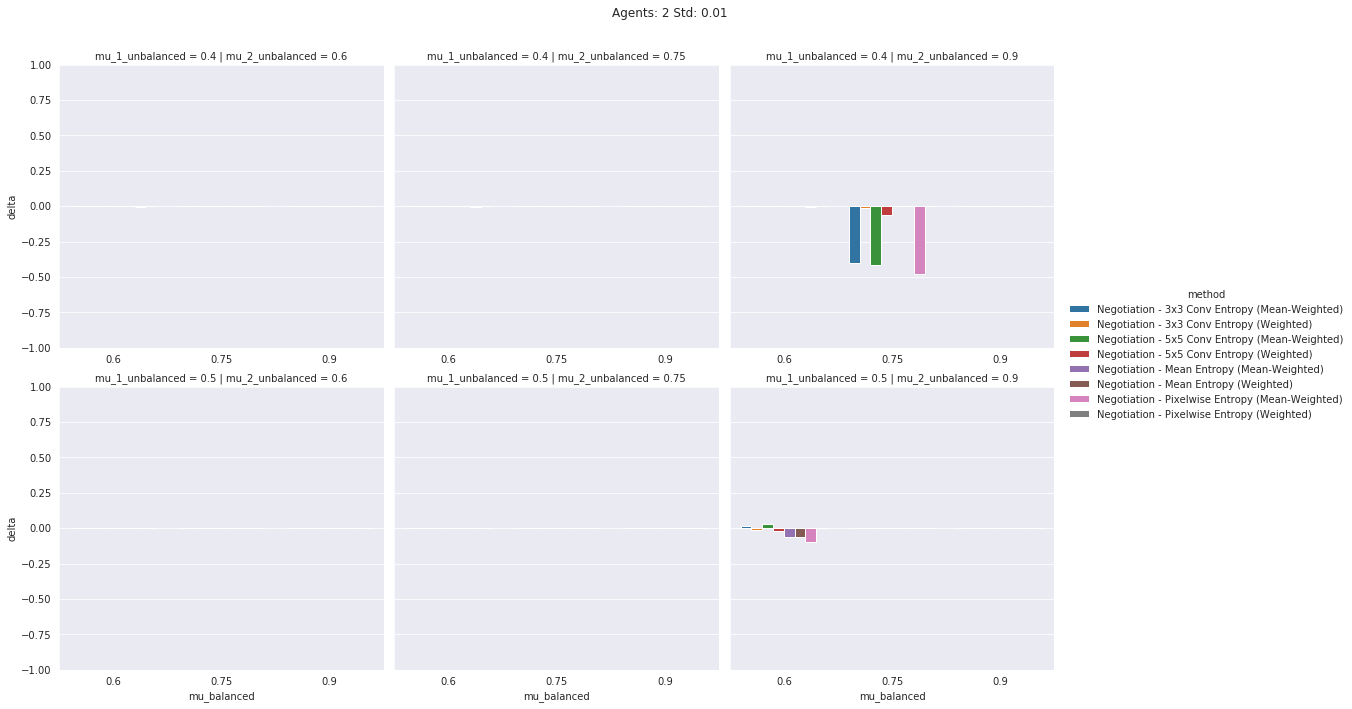

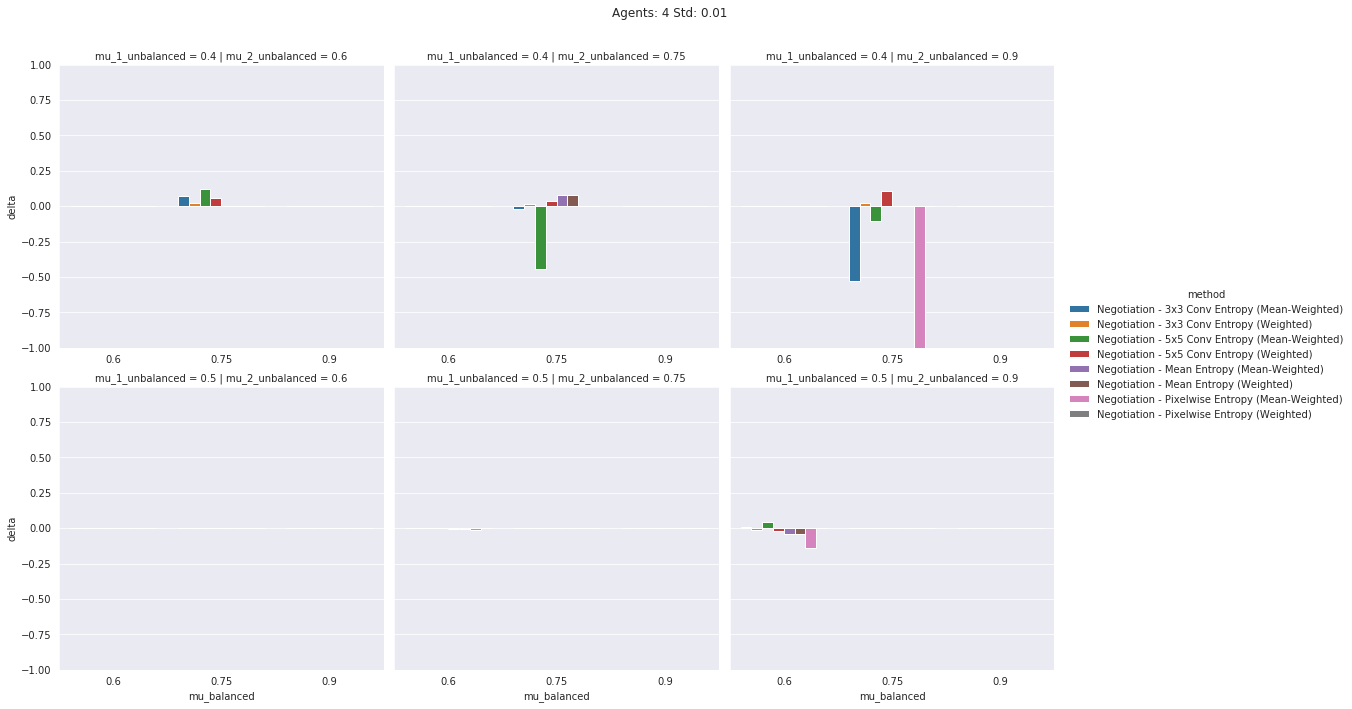

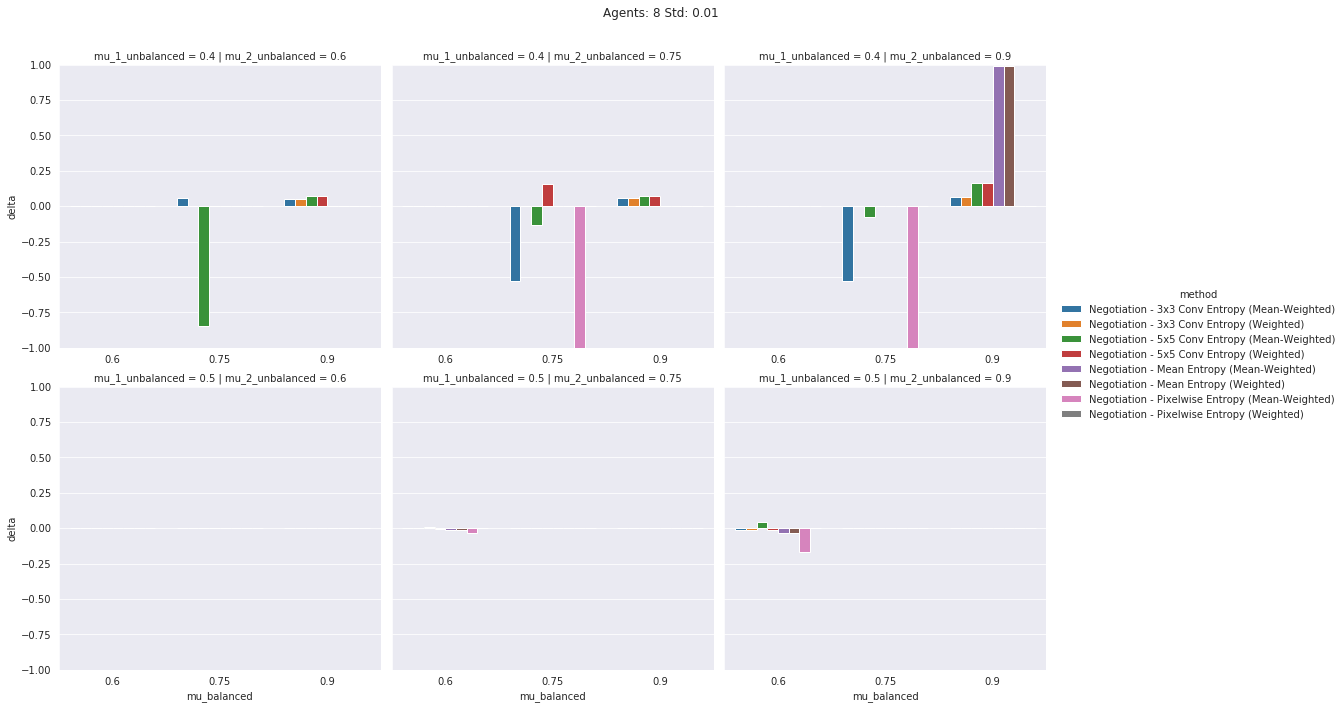

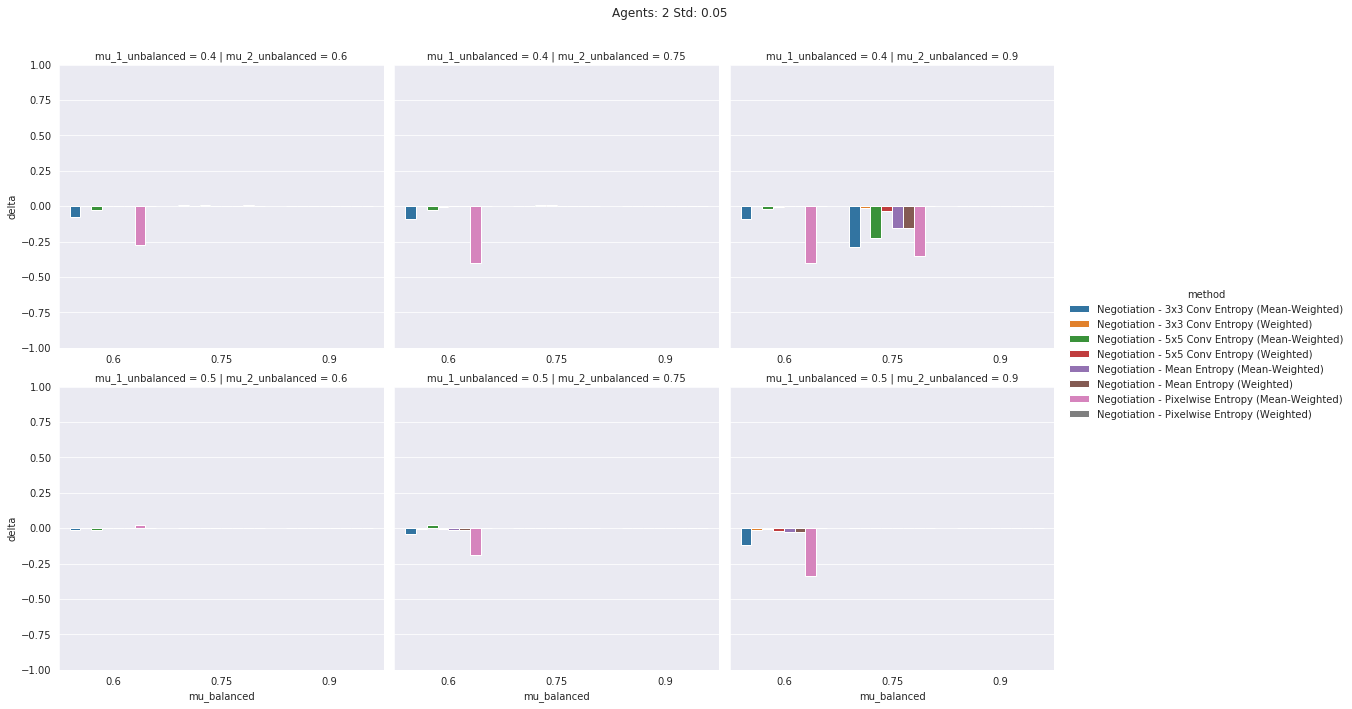

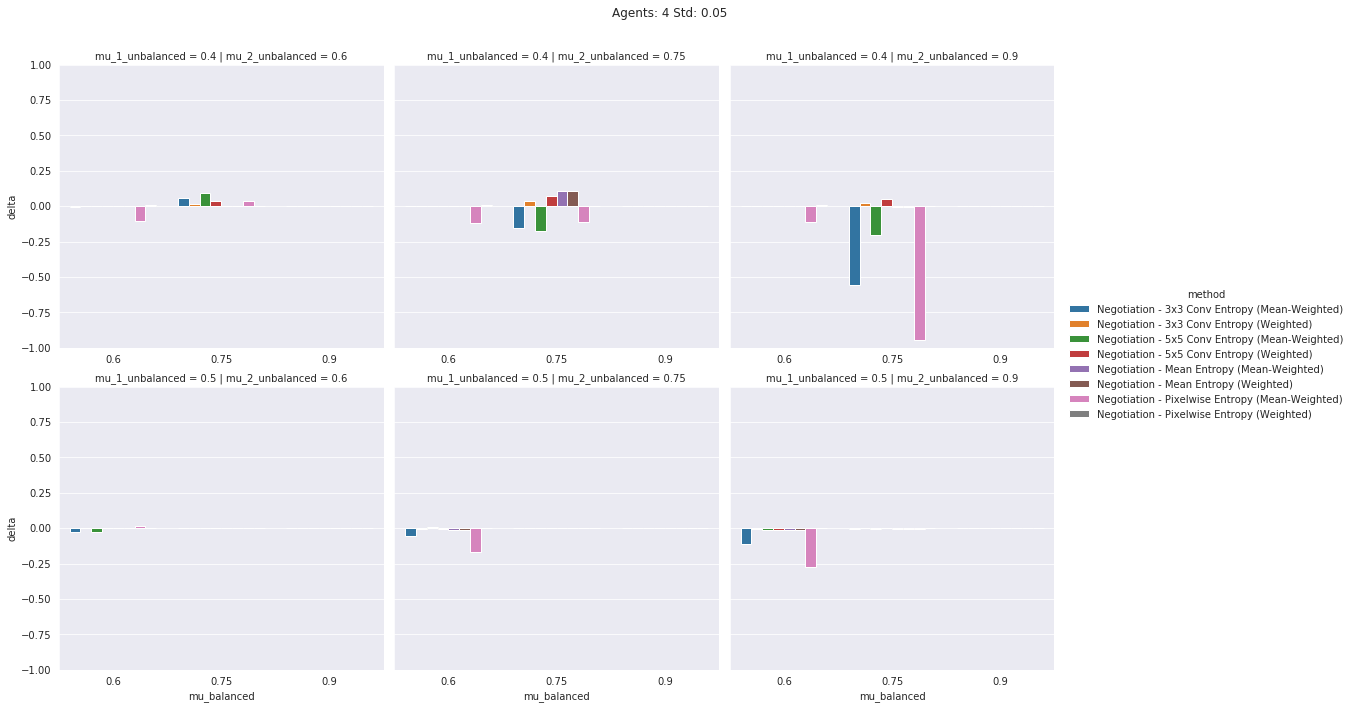

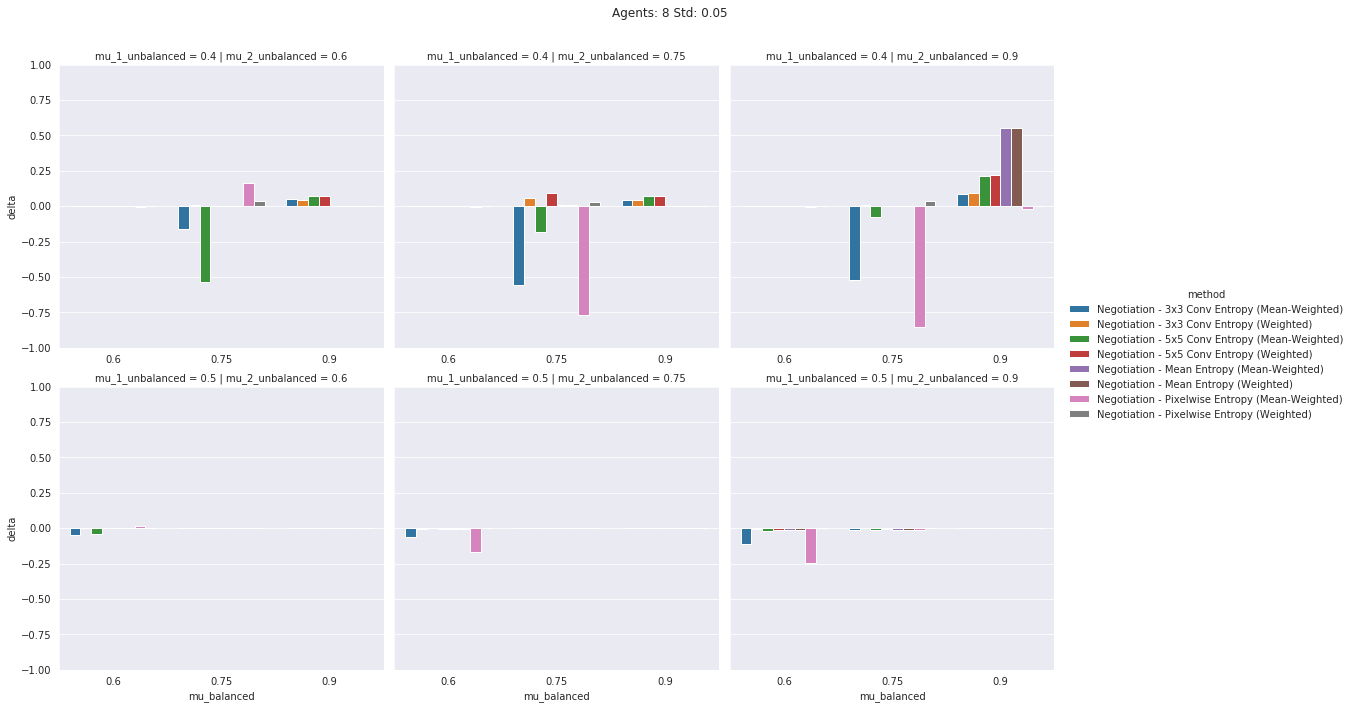

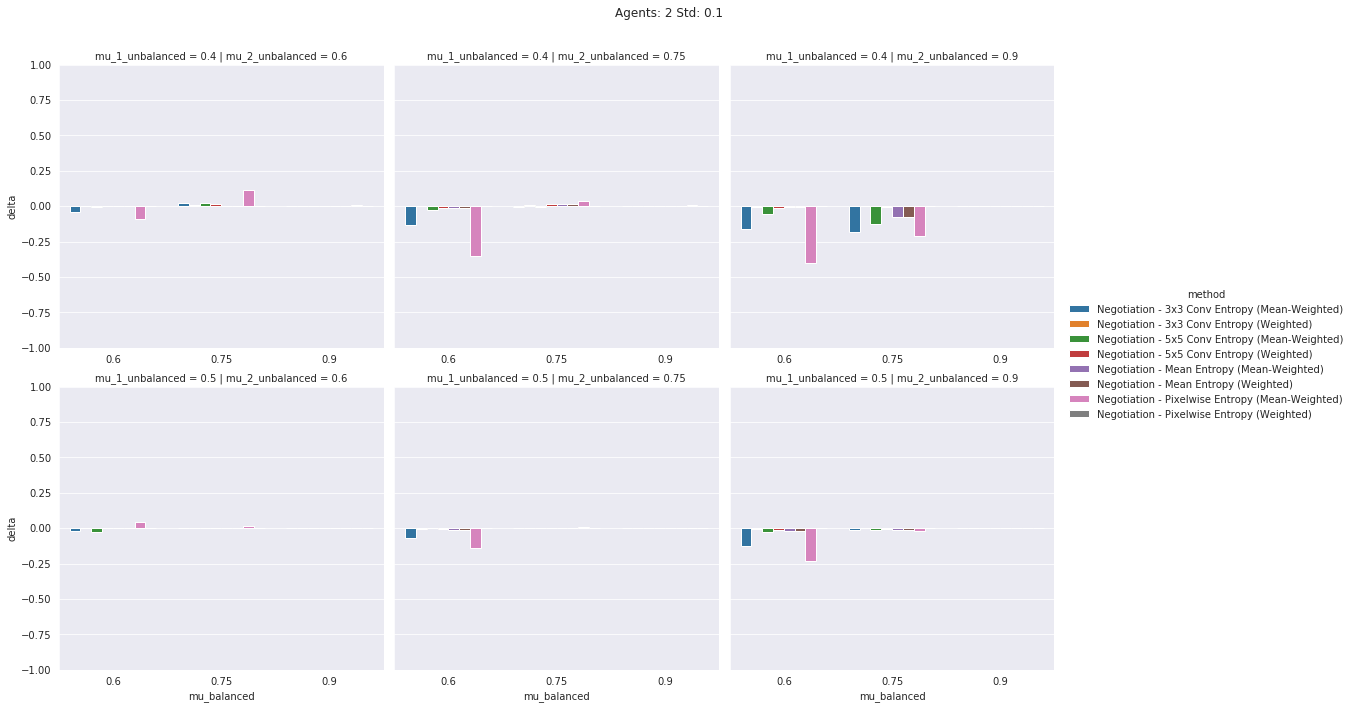

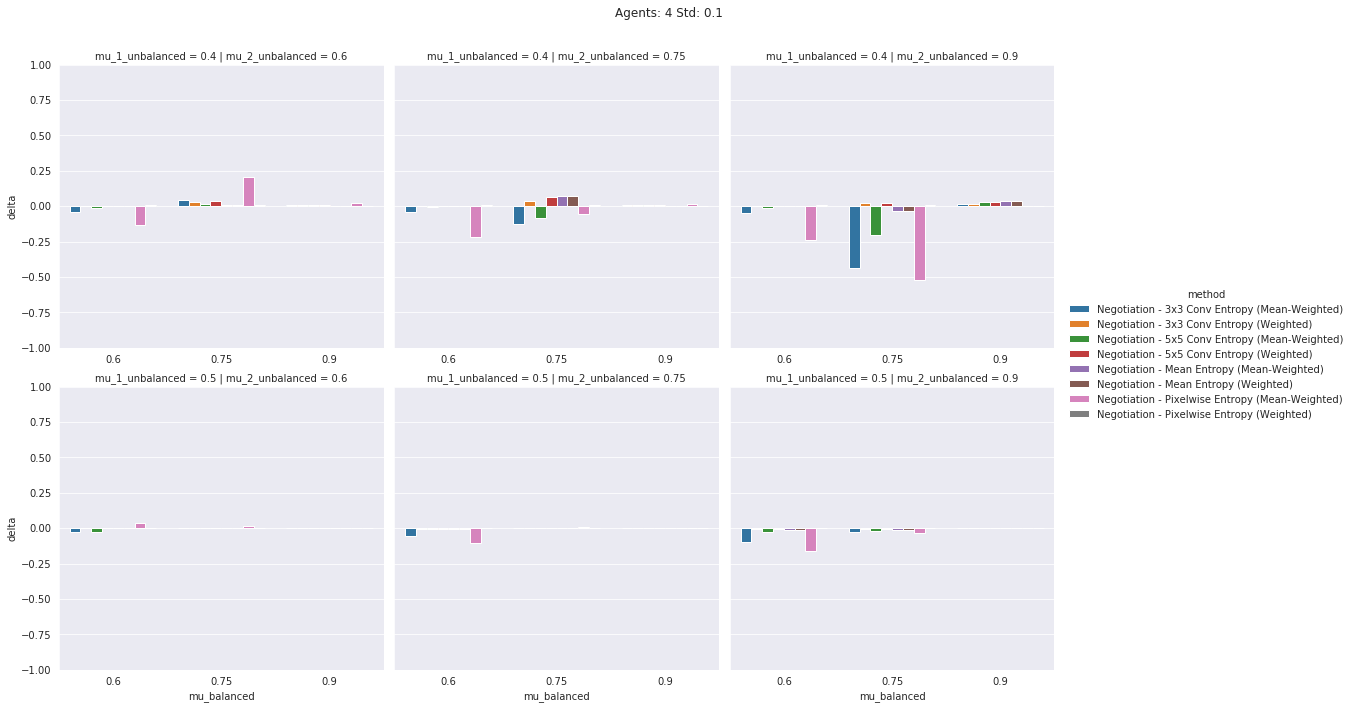

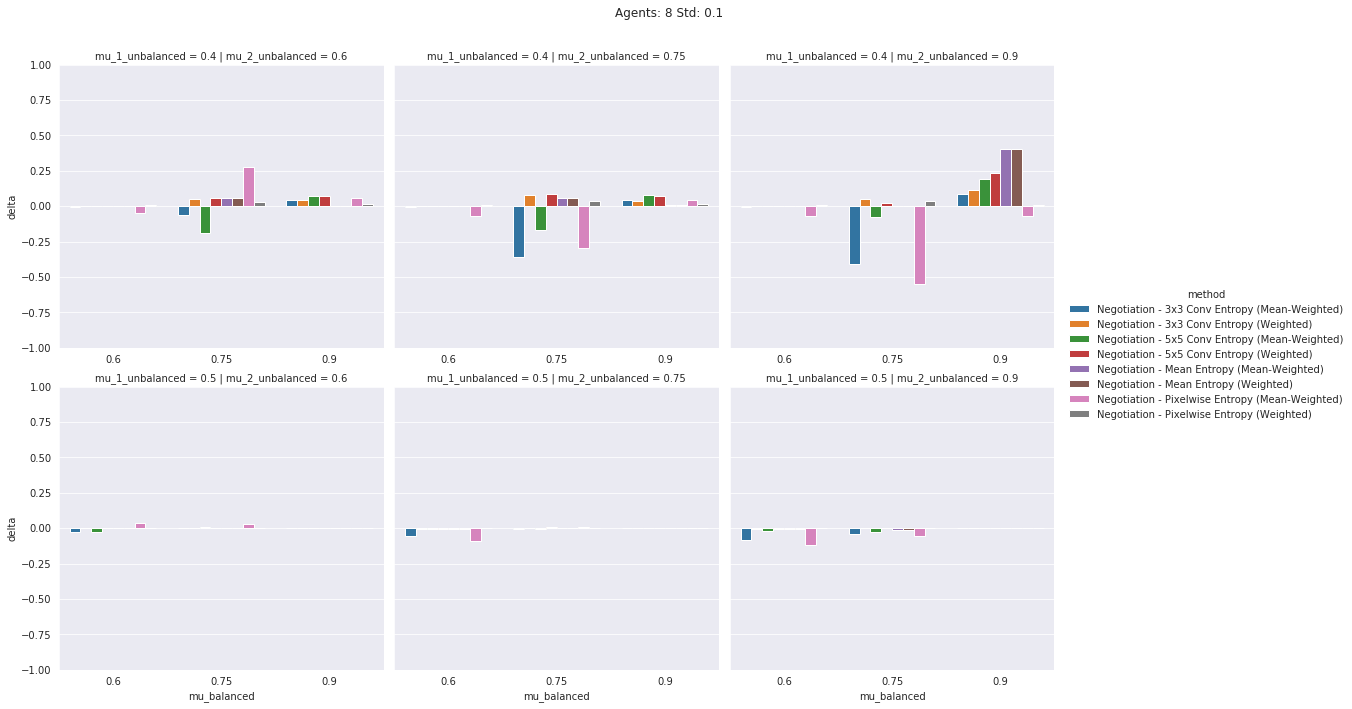

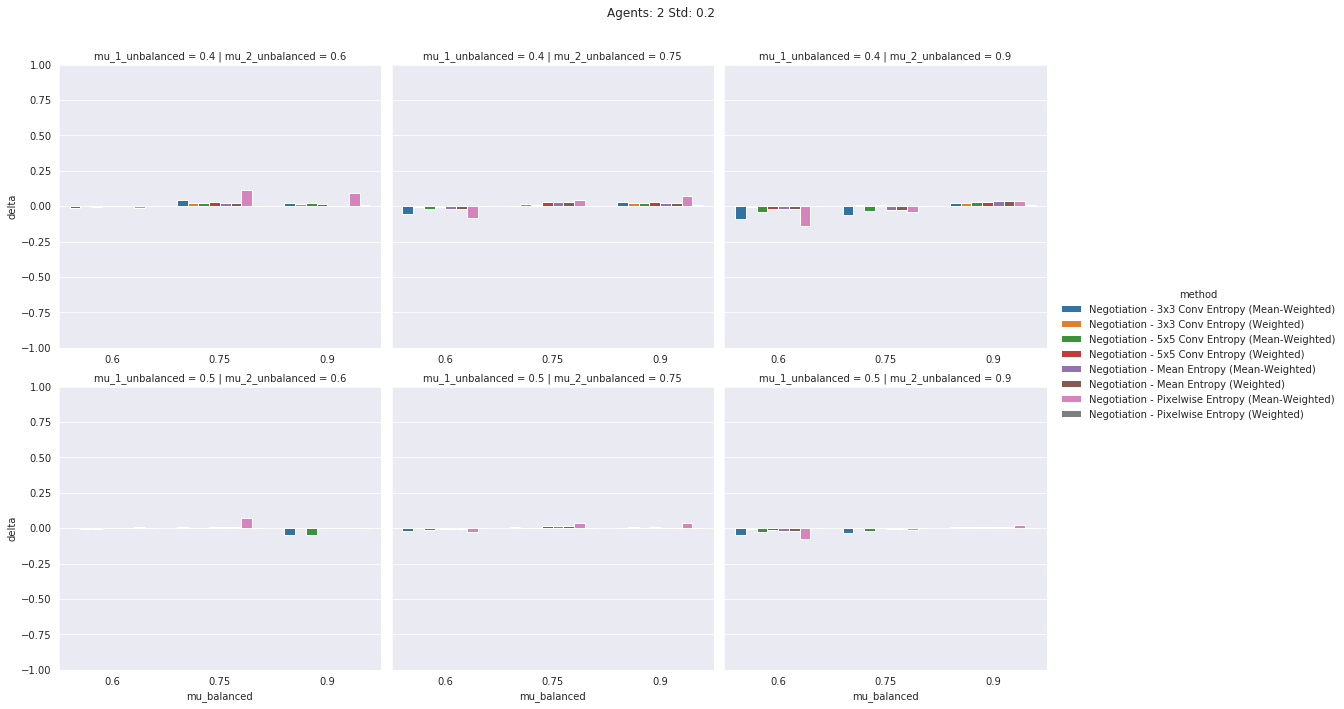

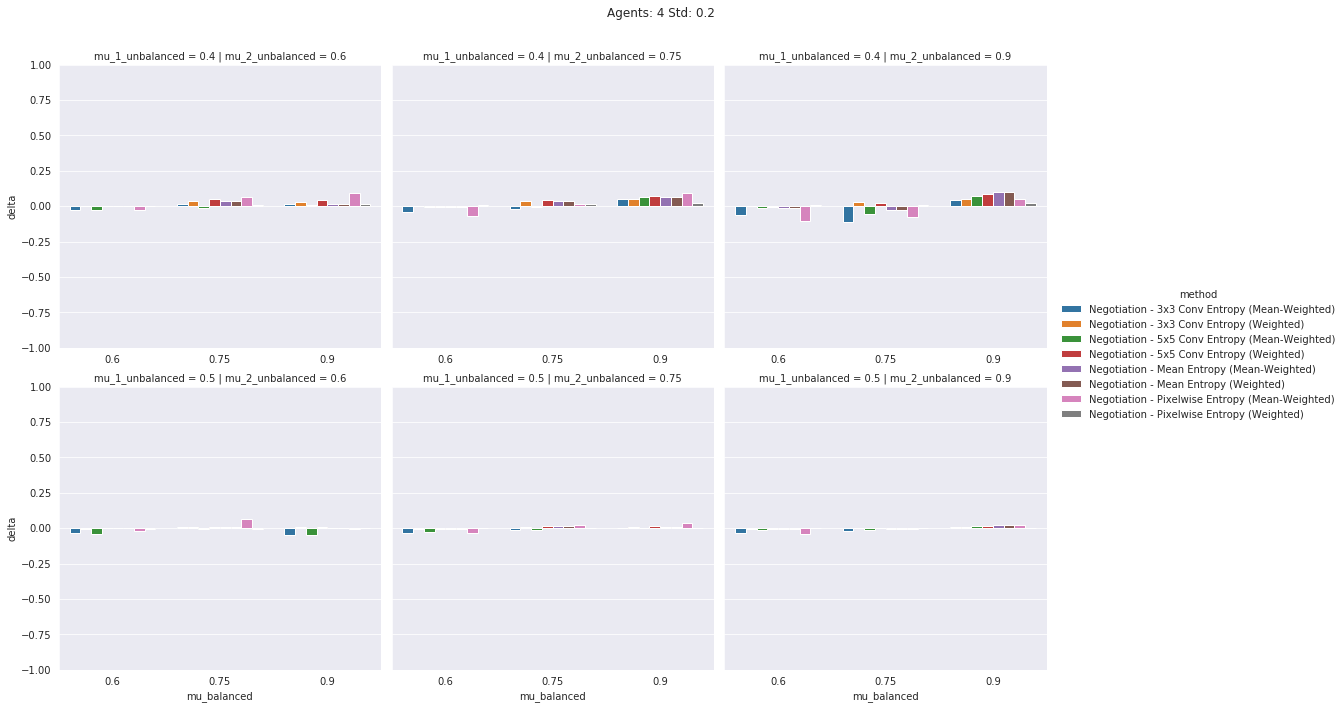

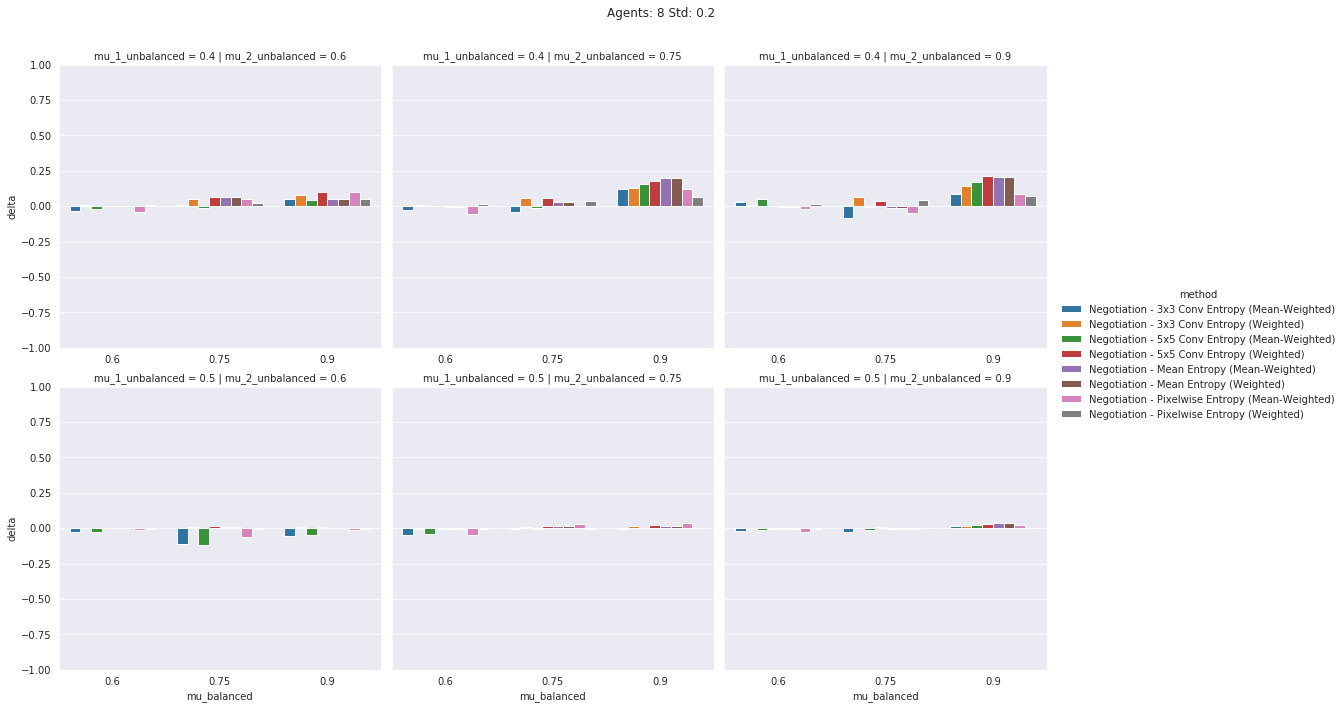

In [3]:
binary_or_multiclass = 'bin'
template = 'chk'
unbalanced_class = 'c2'
data =pd.read_csv('results/{}_{}_balanced_vs_unbalanced_{}.csv'.format(binary_or_multiclass, template, unbalanced_class), index_col=0)
metric_to_show = 'weighted avg_f1-score'
data['meta_method'] = data['method'].apply(parse_aggr_method)
data['confidence_method'] = data['method'].apply(expand_confidence)
data = data[data['meta_method'].isin(['Simple Negotiation', 'Weighted Mean', 'Weighted Negotiation', 'Mean Wgh Negotiation']) ]

# Check delta wrt Weighted mean
deltas = pd.DataFrame()
param_cols = ['mu_1_unbalanced', 'mu_2_unbalanced', 'mu_balanced', 'std', 'unbalanced_agents']
score = ['weighted avg_f1-score']
delta_wrt_to = 'Weighted Mean'
methods_to_keep = ['Mean Wgh Negotiation', 'Weighted Negotiation']
filtered = data[param_cols+score+['confidence_method', 'meta_method', 'method']]
for params, group in filtered.groupby(param_cols+['confidence_method']):
    reference_score = group[group['meta_method']==delta_wrt_to][score].iloc[0,0]
    temp = group.copy()
    temp['delta'] = group[score] - reference_score
    temp = temp[temp['meta_method'].isin(methods_to_keep)]
    deltas = deltas.append(temp, ignore_index=True)
    
sb.set_style('darkgrid')
metric_to_show='delta'
for std, filtered_std in deltas.groupby(['std']):
    for unb_ags, filtered_ags in filtered_std.groupby(['unbalanced_agents']):
        gr = sb.catplot(data=filtered_ags, x='mu_balanced', hue='method', y=metric_to_show, row='mu_1_unbalanced', col='mu_2_unbalanced', kind='bar', sharex=False)
        limits = [a.set_ylim(-1,1) for a in gr.axes.flatten()]
        #sb.relplot(data=filtered_ags, x='mu_balanced', hue='method', y=metric_to_show, row='mu_1_unbalanced', col='mu_2_unbalanced', style='meta_method', kind='line')
        plt.subplots_adjust(top=0.9)
        plt.gcf().suptitle('Agents: ' + str(unb_ags) + " Std: " + str(std))
        folder = 'results/graphs/{}/'.format(metric_to_show)
        os.makedirs(folder, exist_ok=True)
        #plt.savefig(folder + '{}_{}_balanced_vs_unbalanced_{}_std-{}_unbagents-{}.png'.format(binary_or_multiclass, template, unbalanced_class, std, unb_ags))
        

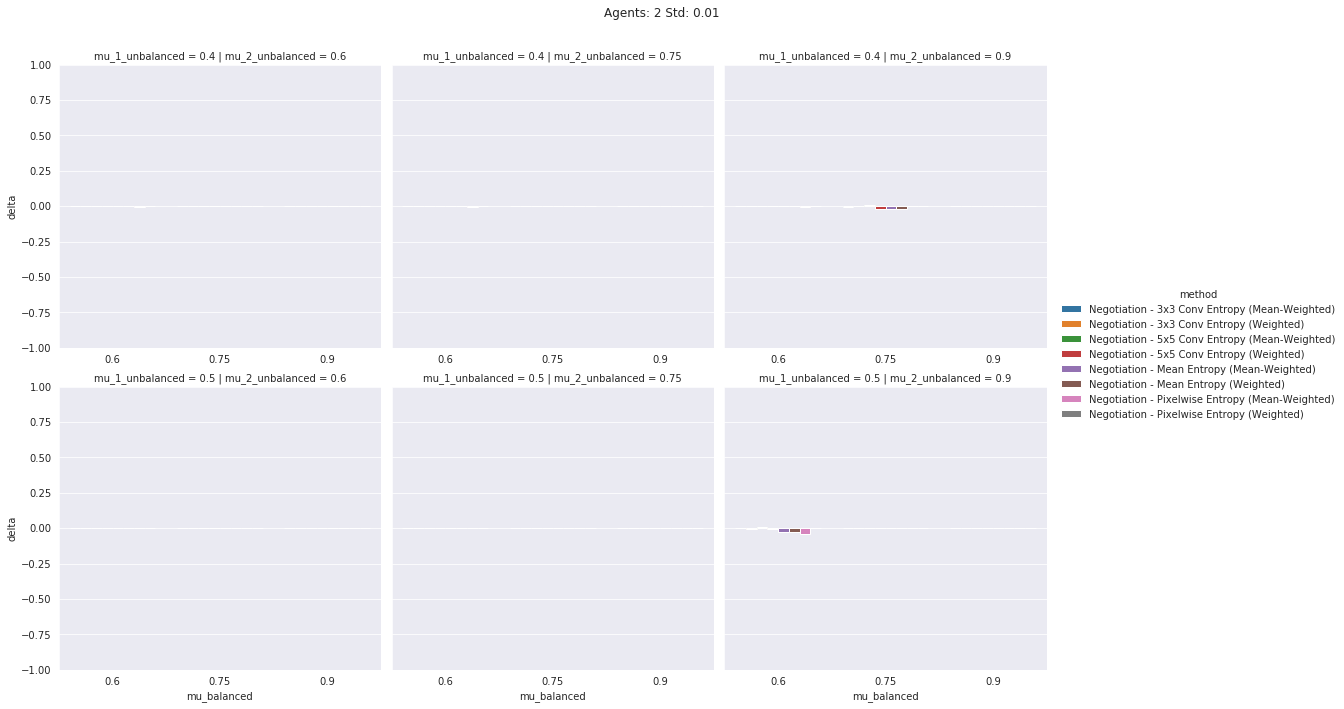

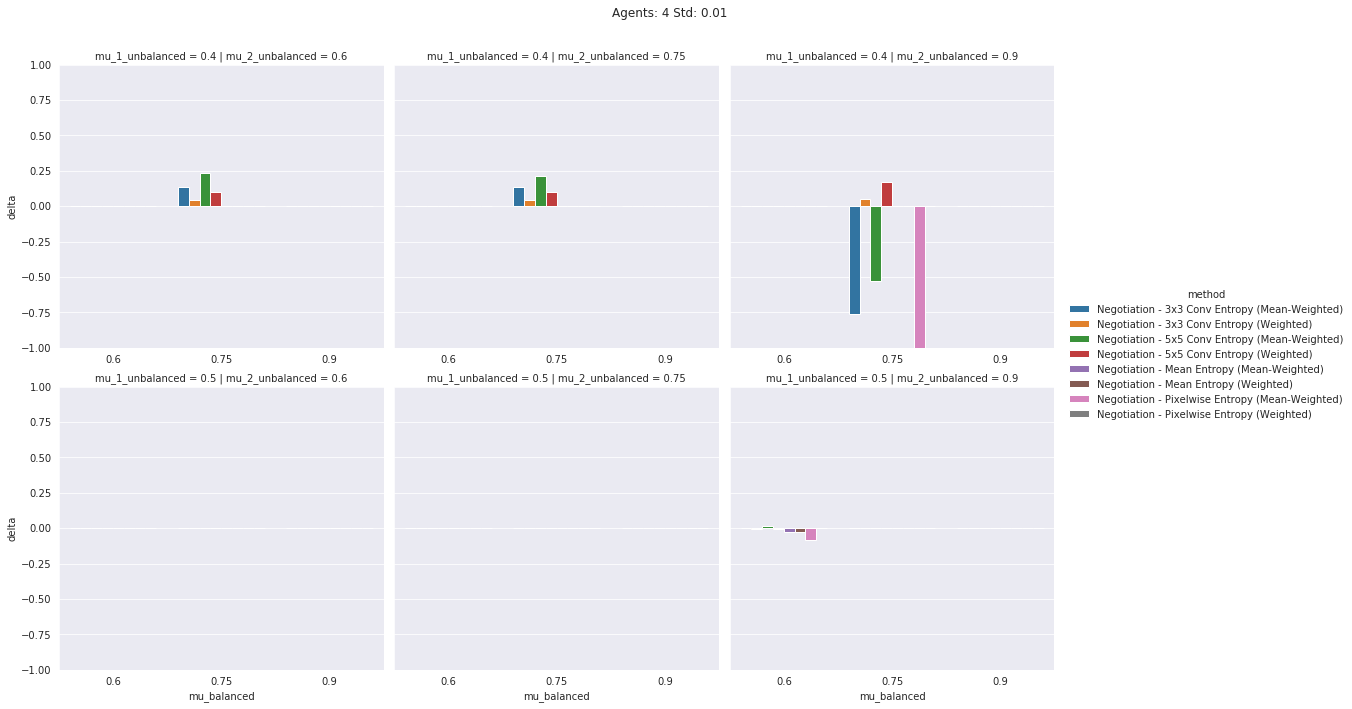

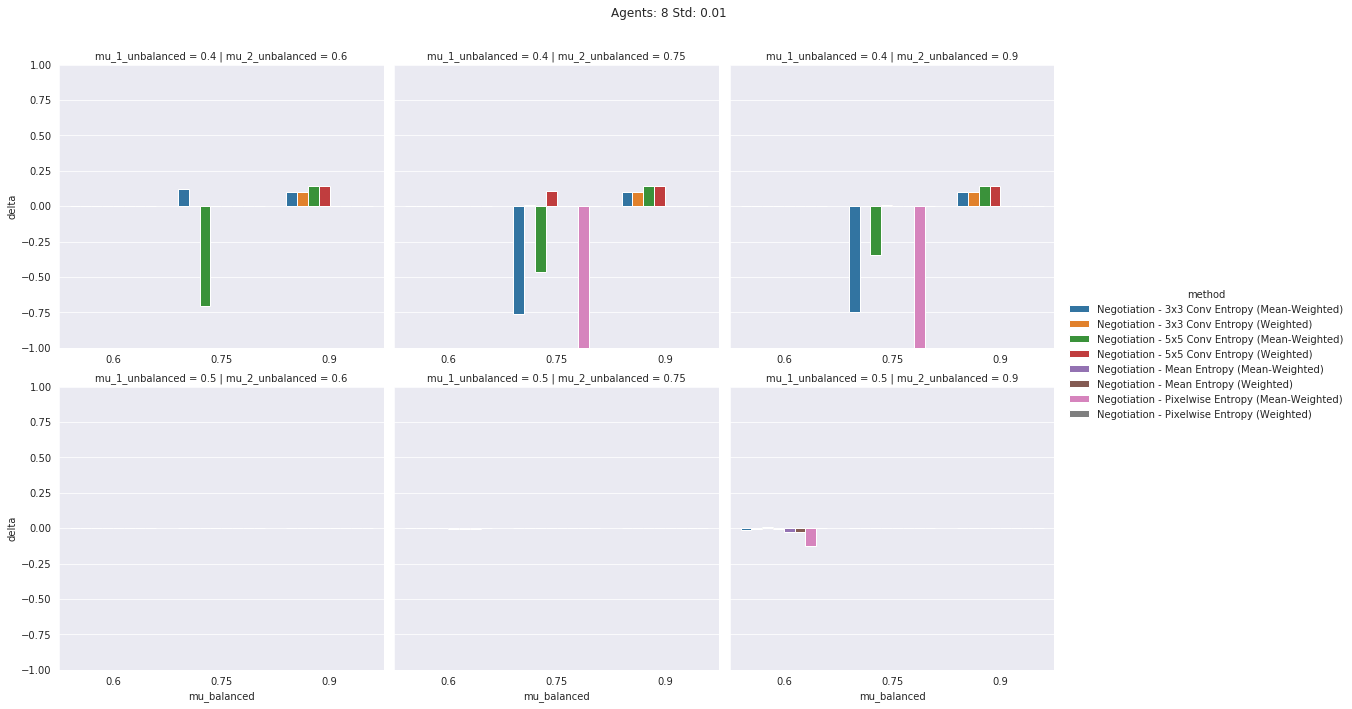

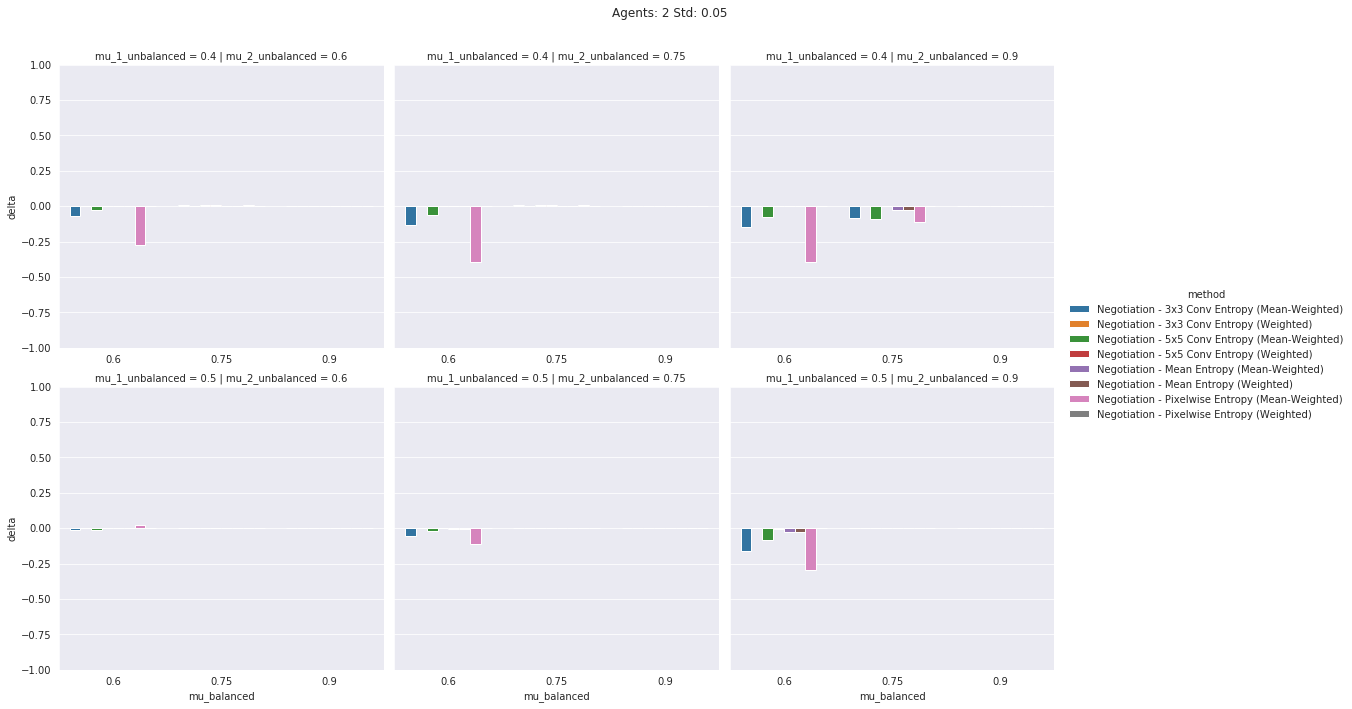

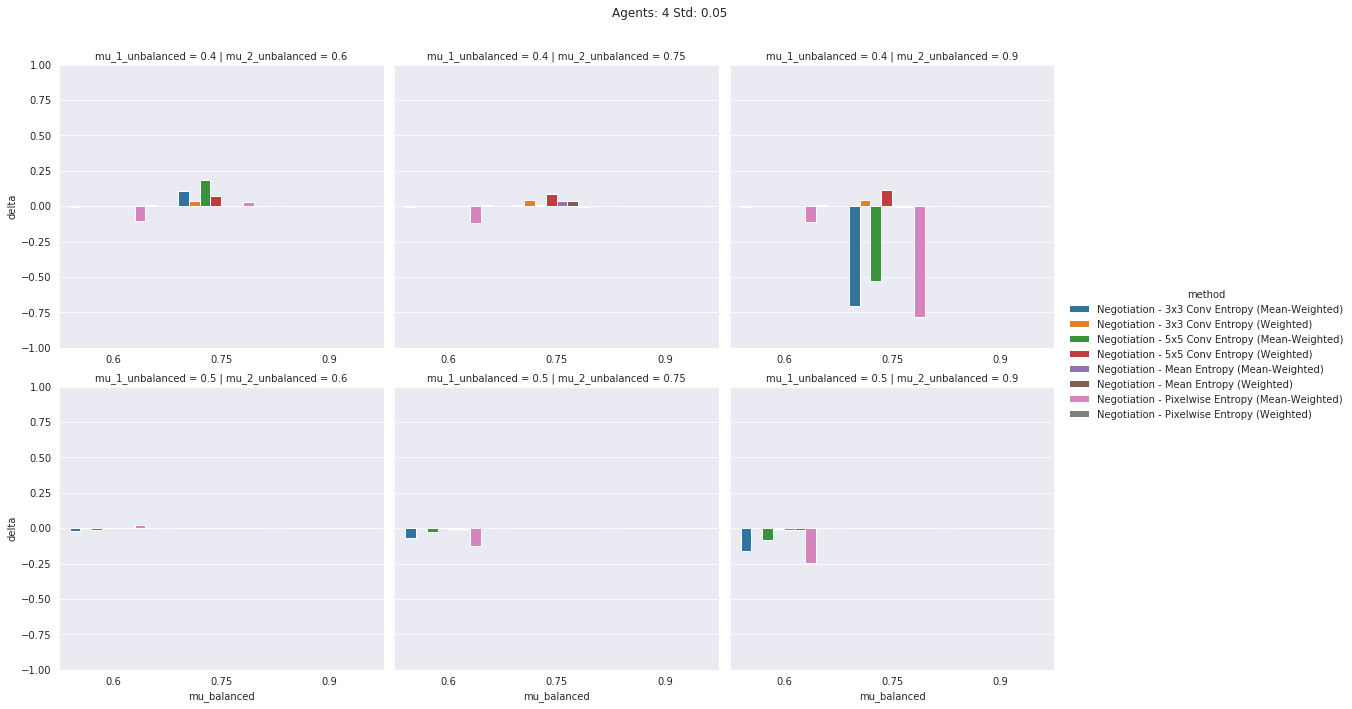

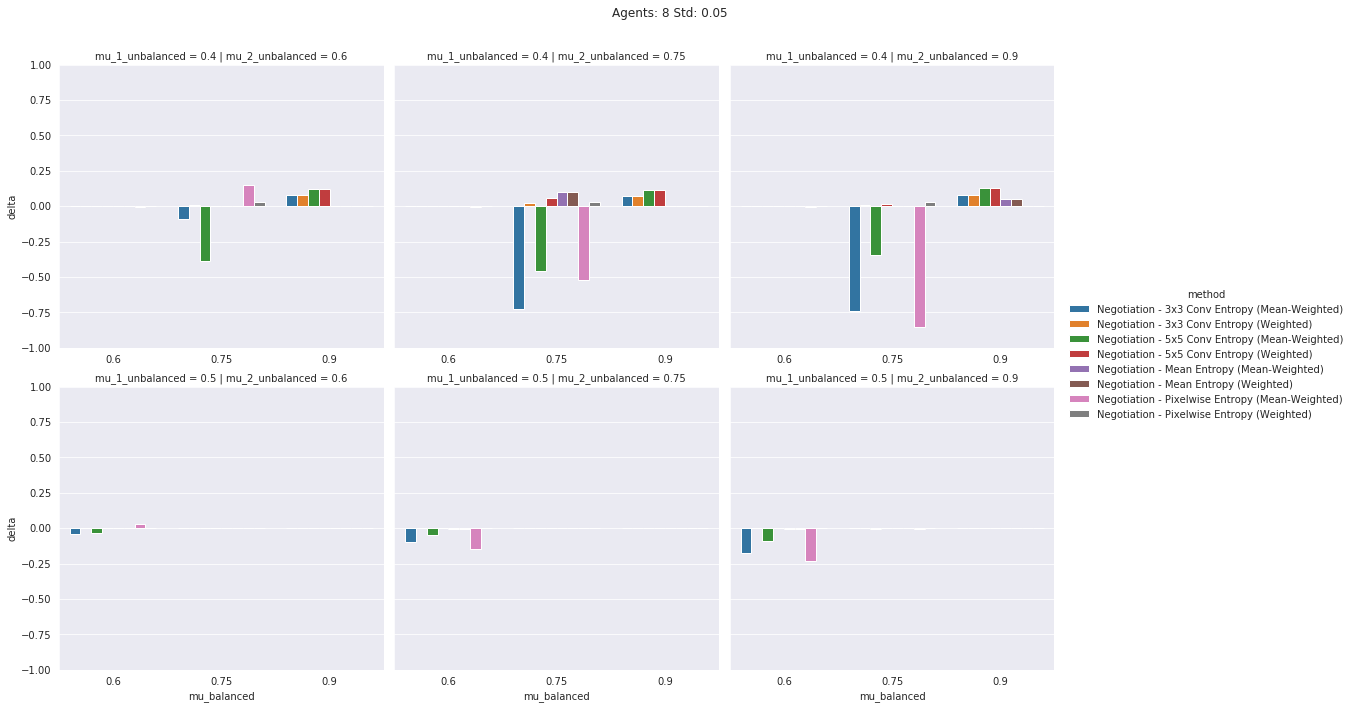

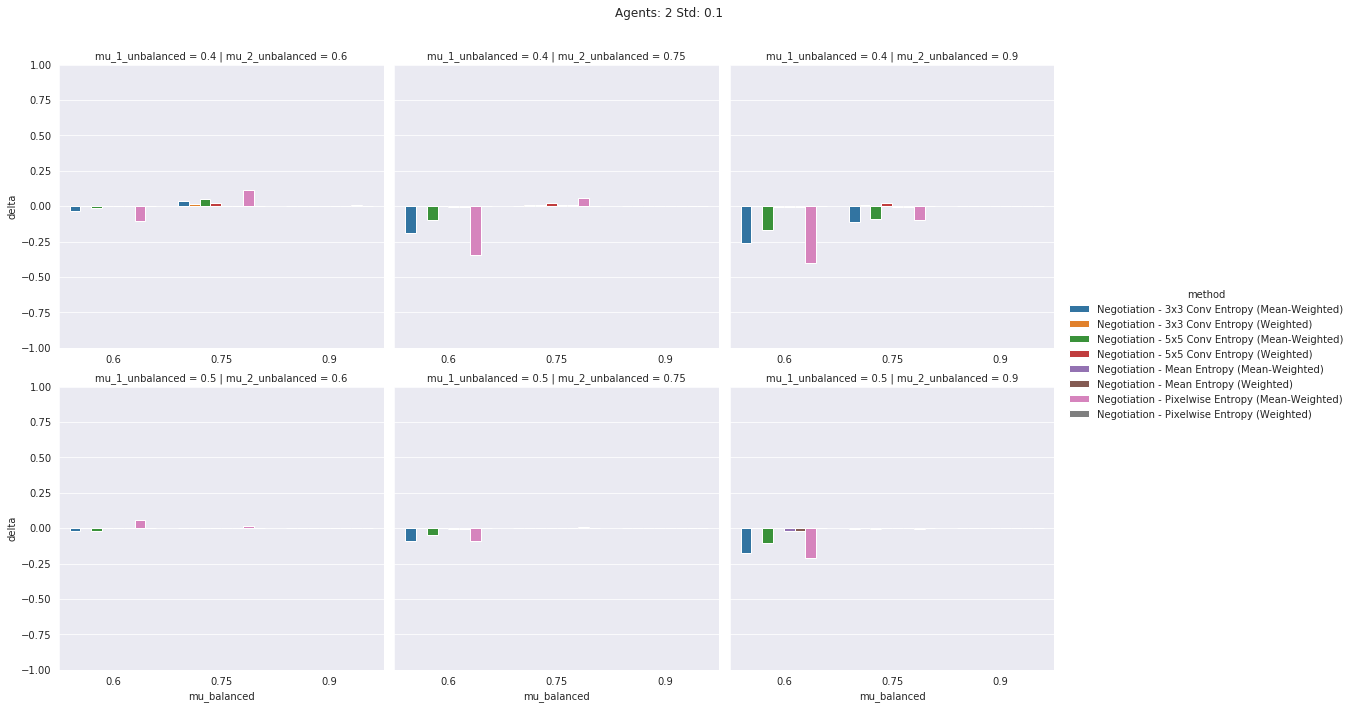

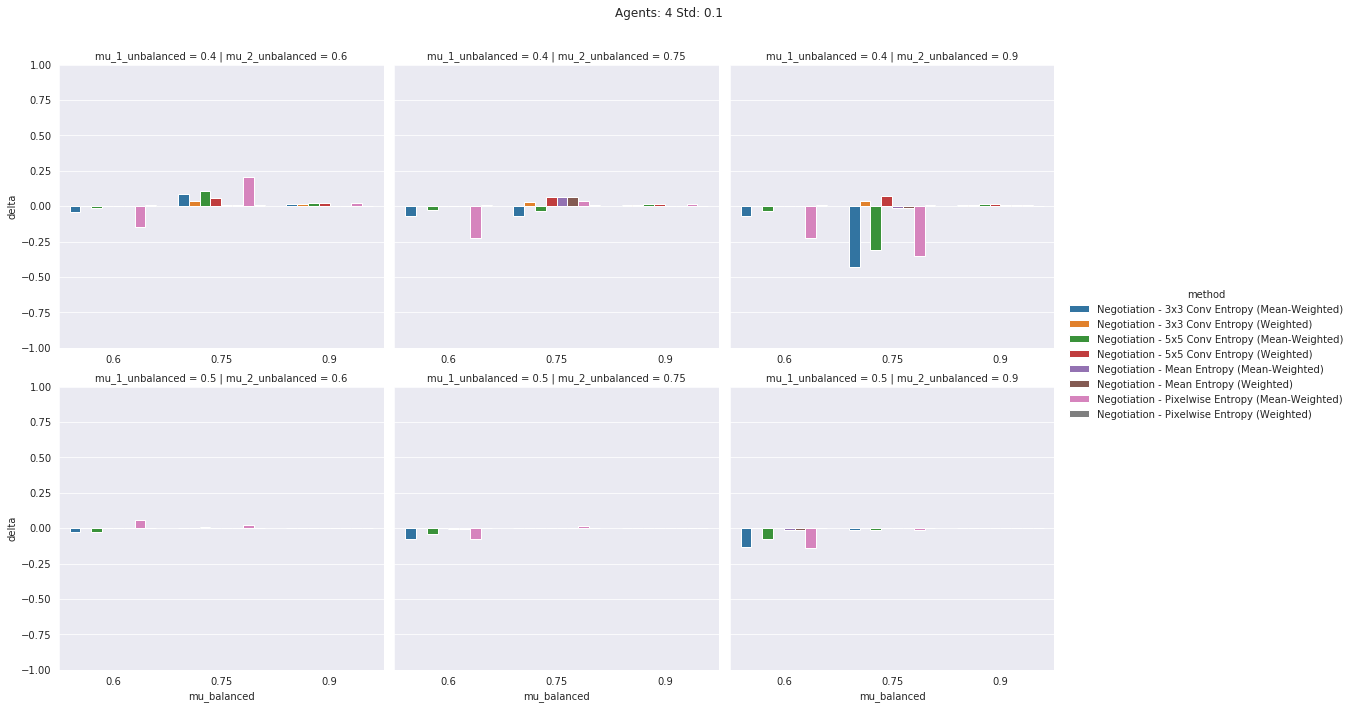

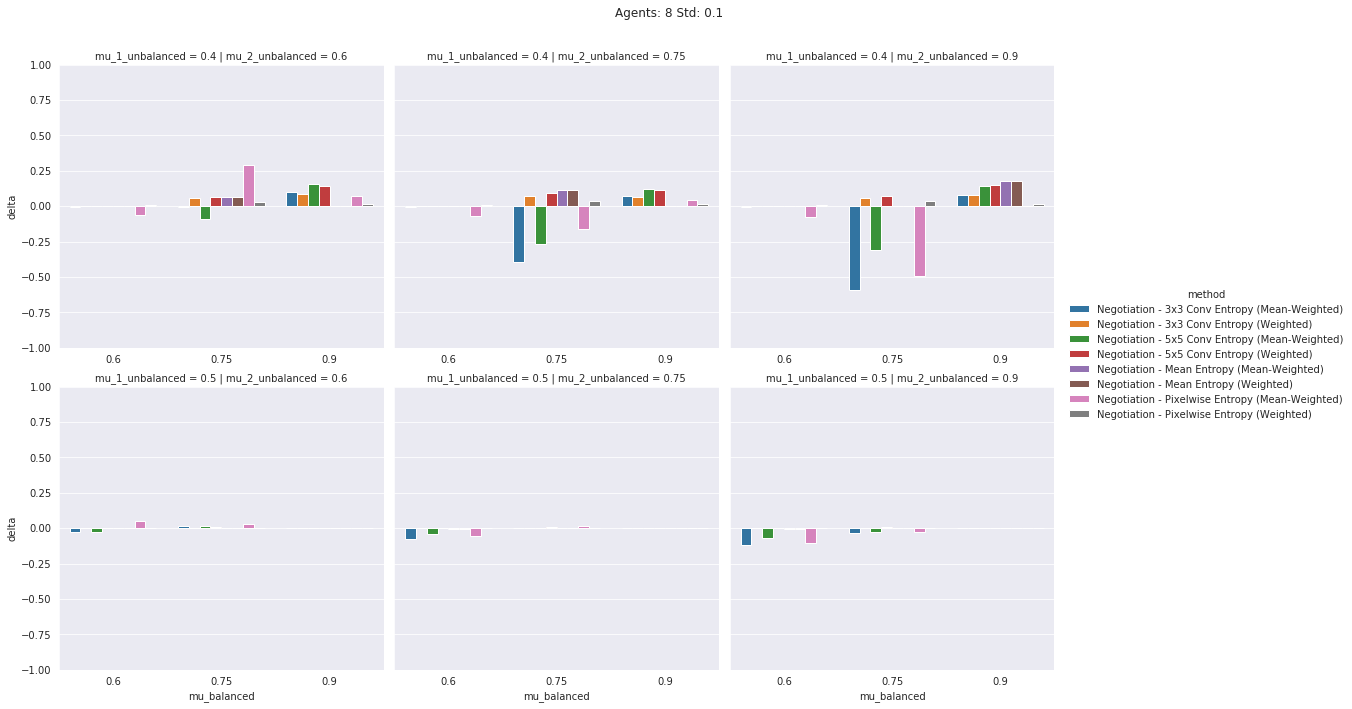

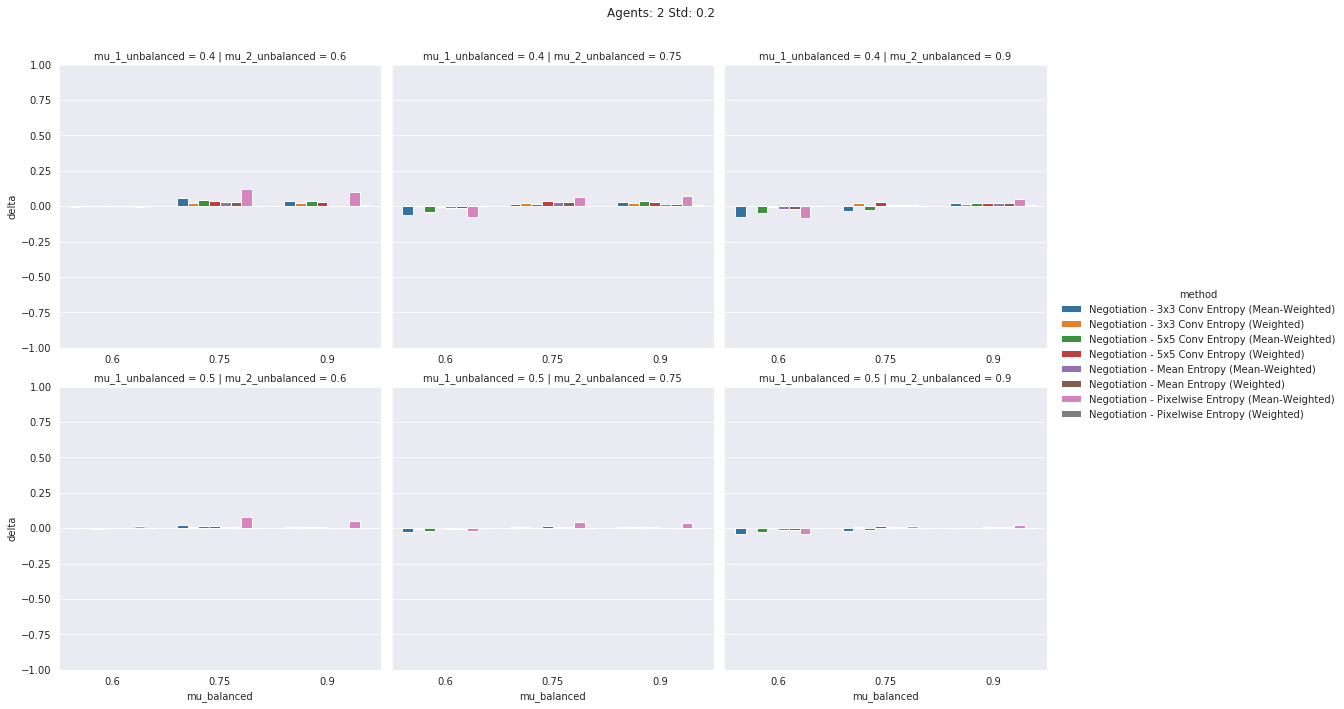

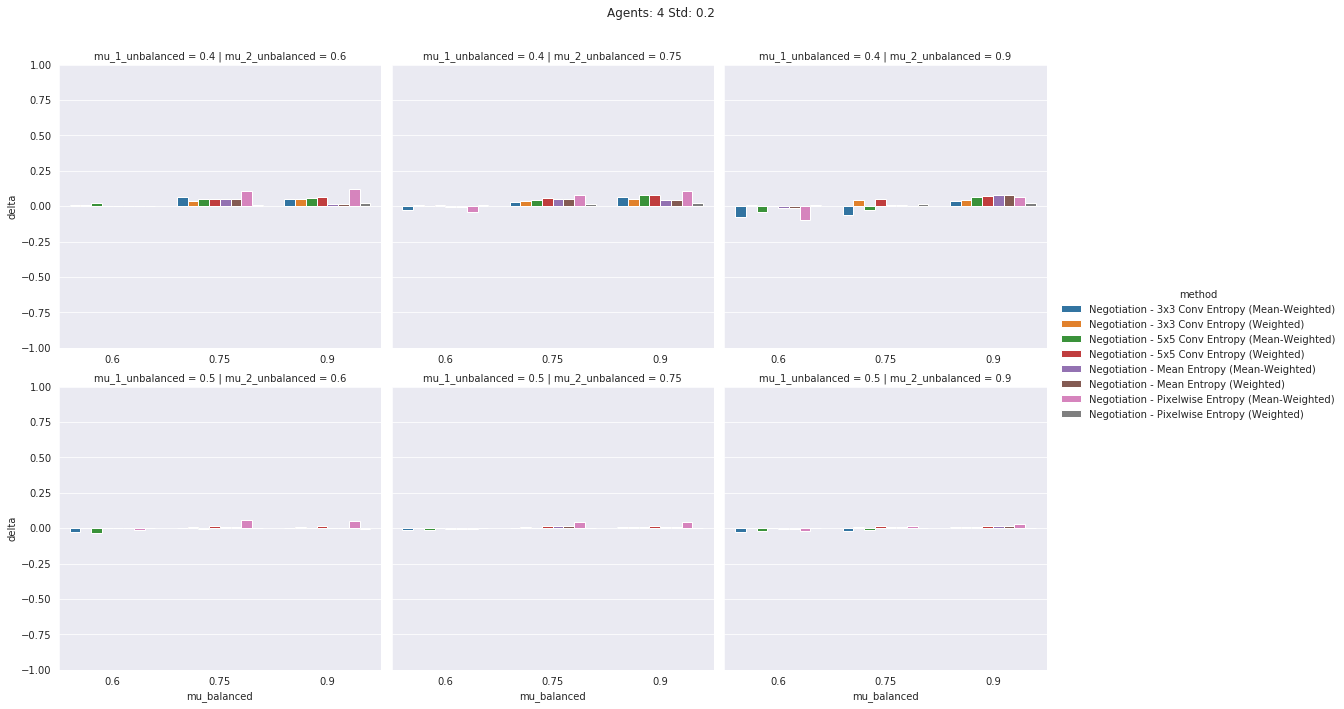

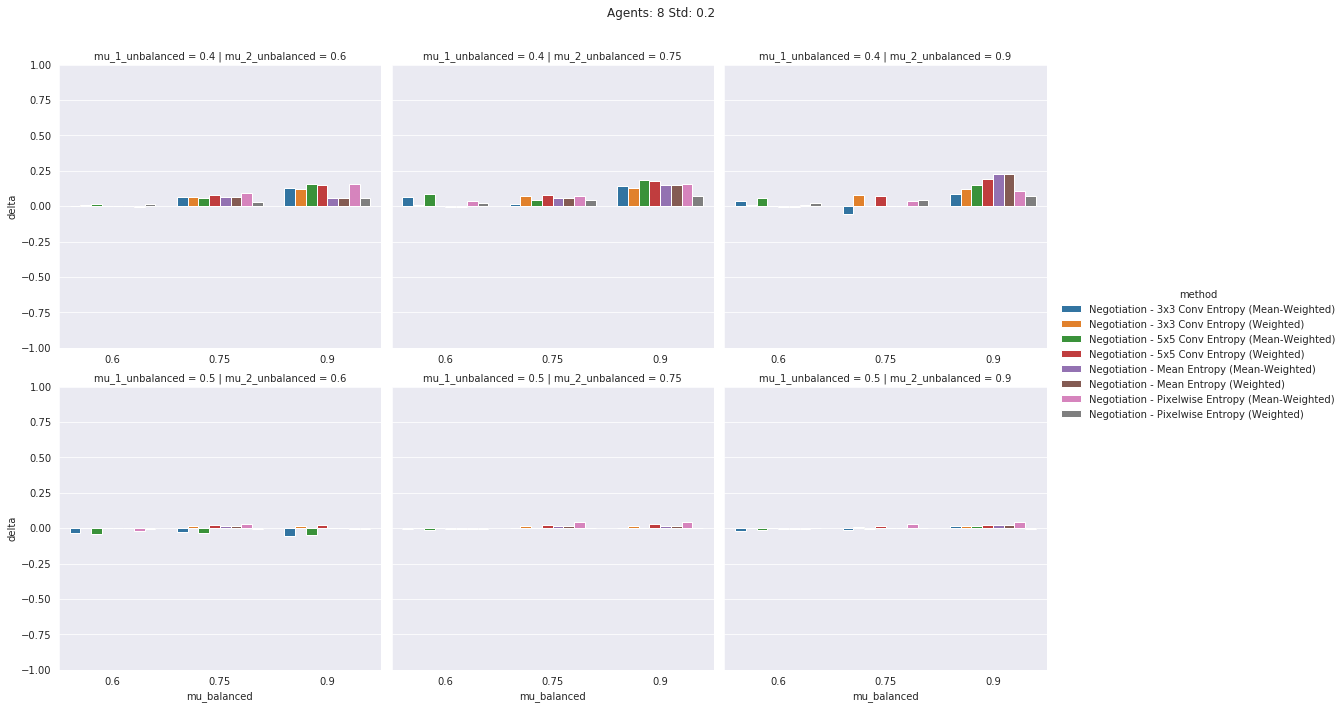

In [4]:
binary_or_multiclass = 'bin'
template = 'blob'
unbalanced_class = 'c2'
data =pd.read_csv('results/{}_{}_balanced_vs_unbalanced_{}.csv'.format(binary_or_multiclass, template, unbalanced_class), index_col=0)
metric_to_show = 'weighted avg_f1-score'
data['meta_method'] = data['method'].apply(parse_aggr_method)
data['confidence_method'] = data['method'].apply(expand_confidence)
data = data[data['meta_method'].isin(['Simple Negotiation', 'Weighted Mean', 'Weighted Negotiation', 'Mean Wgh Negotiation']) ]

# Check delta wrt Weighted mean
deltas = pd.DataFrame()
param_cols = ['mu_1_unbalanced', 'mu_2_unbalanced', 'mu_balanced', 'std', 'unbalanced_agents']
score = ['weighted avg_f1-score']
delta_wrt_to = 'Weighted Mean'
methods_to_keep = ['Mean Wgh Negotiation', 'Weighted Negotiation']
filtered = data[param_cols+score+['confidence_method', 'meta_method', 'method']]
for params, group in filtered.groupby(param_cols+['confidence_method']):
    reference_score = group[group['meta_method']==delta_wrt_to][score].iloc[0,0]
    temp = group.copy()
    temp['delta'] = group[score] - reference_score
    temp = temp[temp['meta_method'].isin(methods_to_keep)]
    deltas = deltas.append(temp, ignore_index=True)
    
sb.set_style('darkgrid')
metric_to_show='delta'
for std, filtered_std in deltas.groupby(['std']):
    for unb_ags, filtered_ags in filtered_std.groupby(['unbalanced_agents']):
        gr = sb.catplot(data=filtered_ags, x='mu_balanced', hue='method', y=metric_to_show, row='mu_1_unbalanced', col='mu_2_unbalanced', kind='bar', sharex=False)
        limits = [a.set_ylim(-1,1) for a in gr.axes.flatten()]
        #sb.relplot(data=filtered_ags, x='mu_balanced', hue='method', y=metric_to_show, row='mu_1_unbalanced', col='mu_2_unbalanced', style='meta_method', kind='line')
        plt.subplots_adjust(top=0.9)
        plt.gcf().suptitle('Agents: ' + str(unb_ags) + " Std: " + str(std))
        folder = 'results/graphs/{}/'.format(metric_to_show)
        os.makedirs(folder, exist_ok=True)
        #plt.savefig(folder + '{}_{}_balanced_vs_unbalanced_{}_std-{}_unbagents-{}.png'.format(binary_or_multiclass, template, unbalanced_class, std, unb_ags))

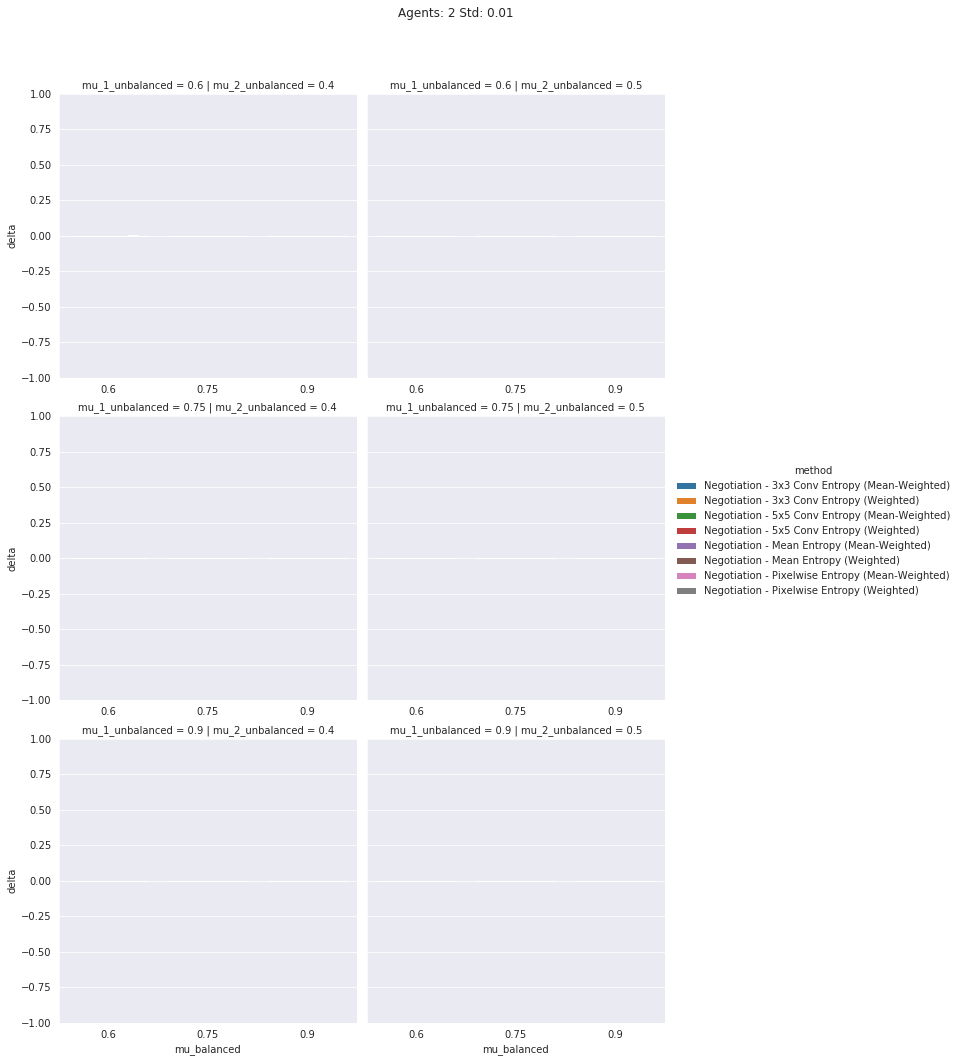

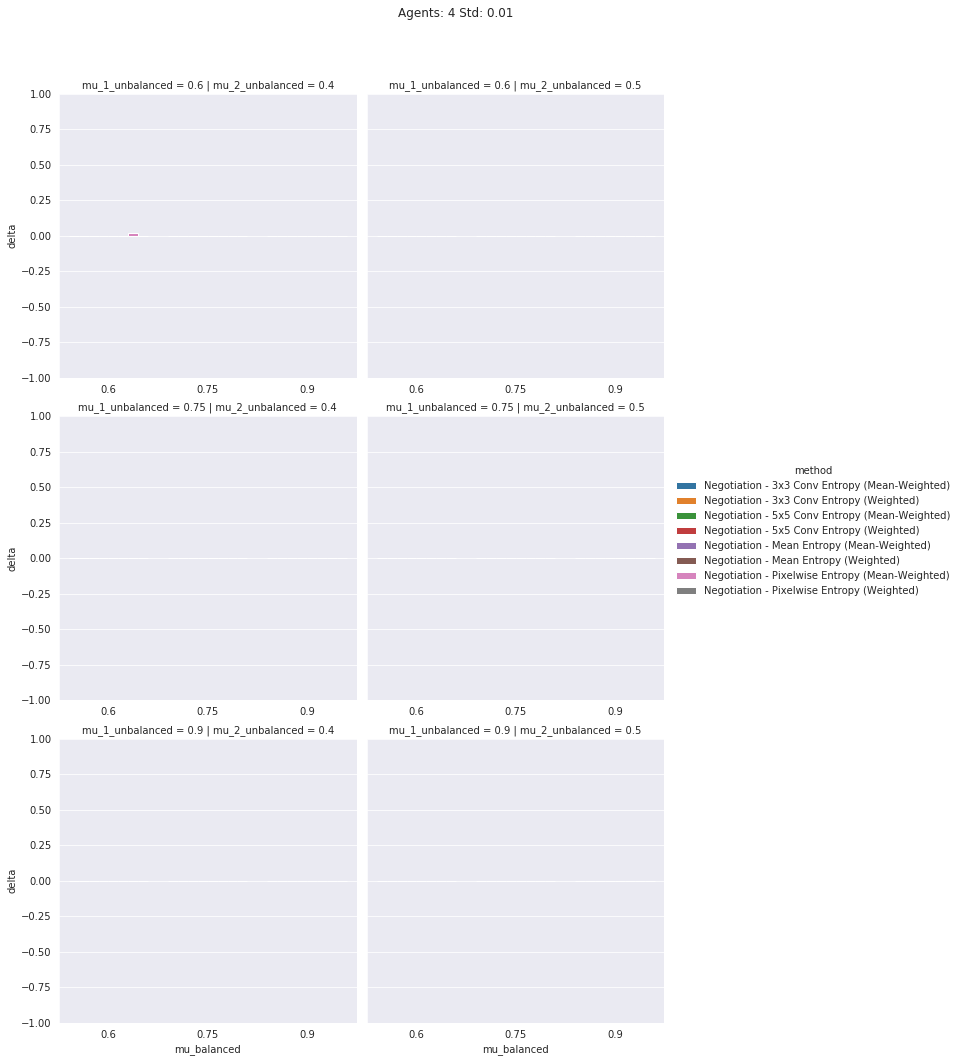

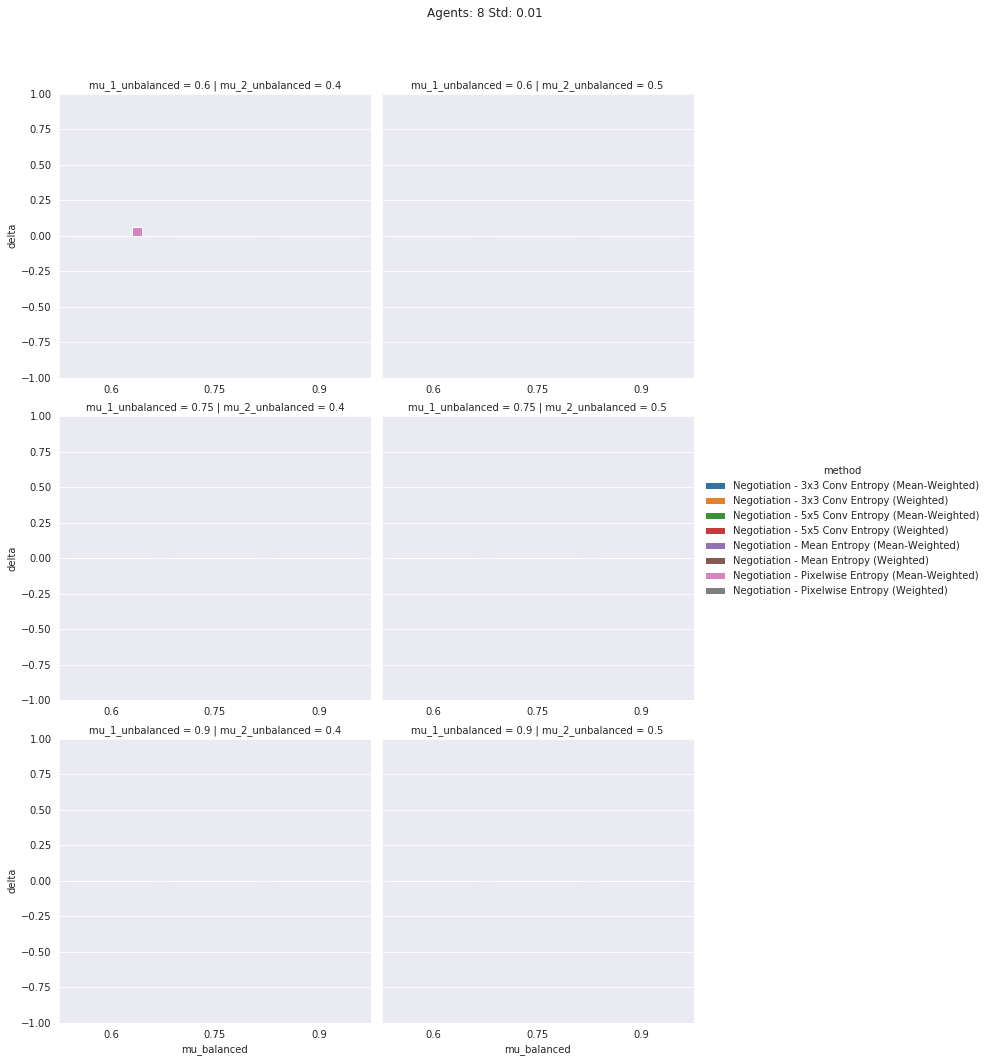

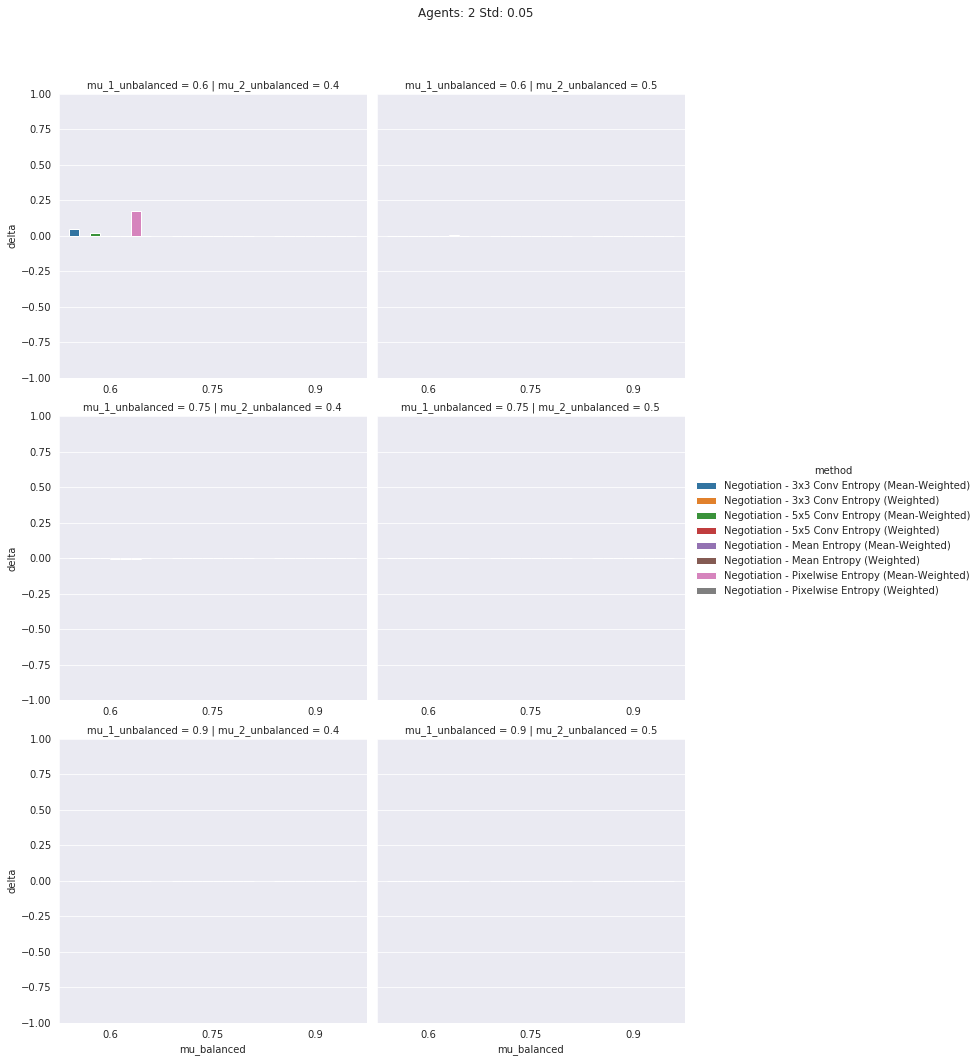

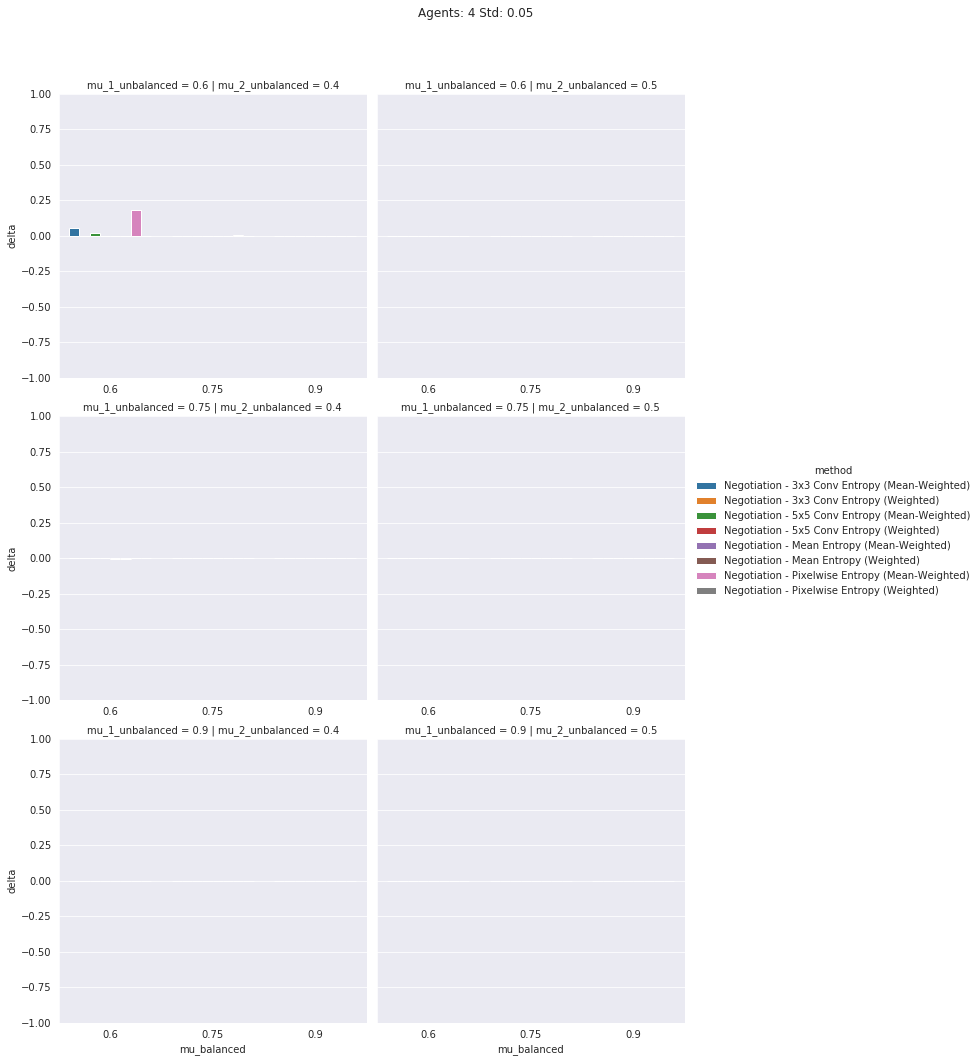

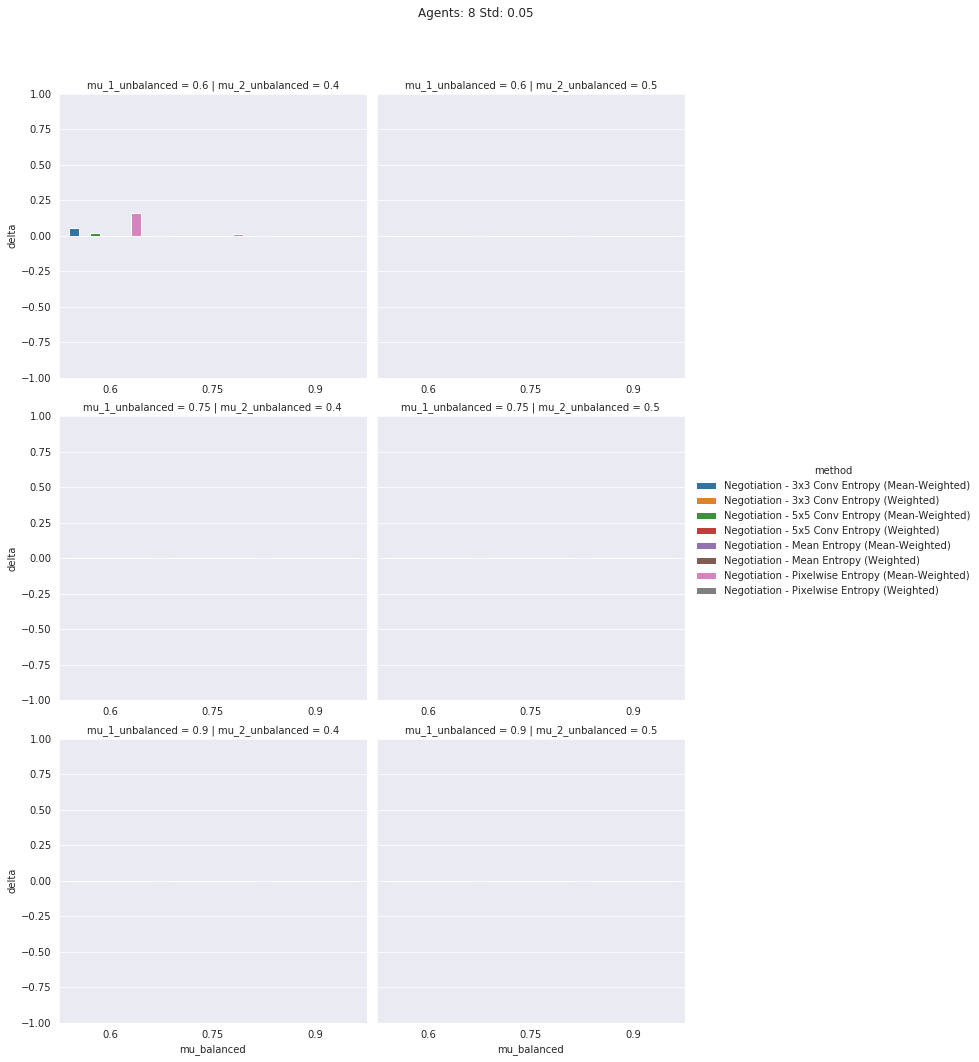

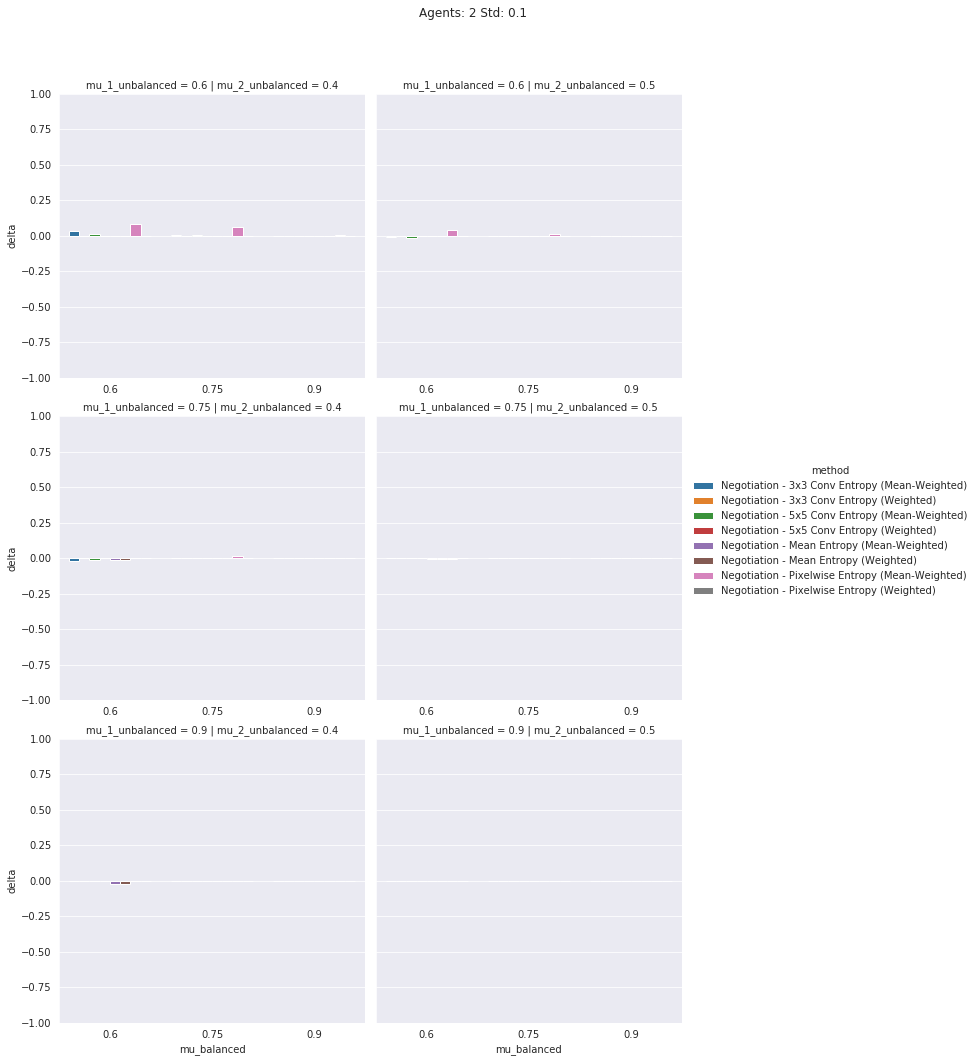

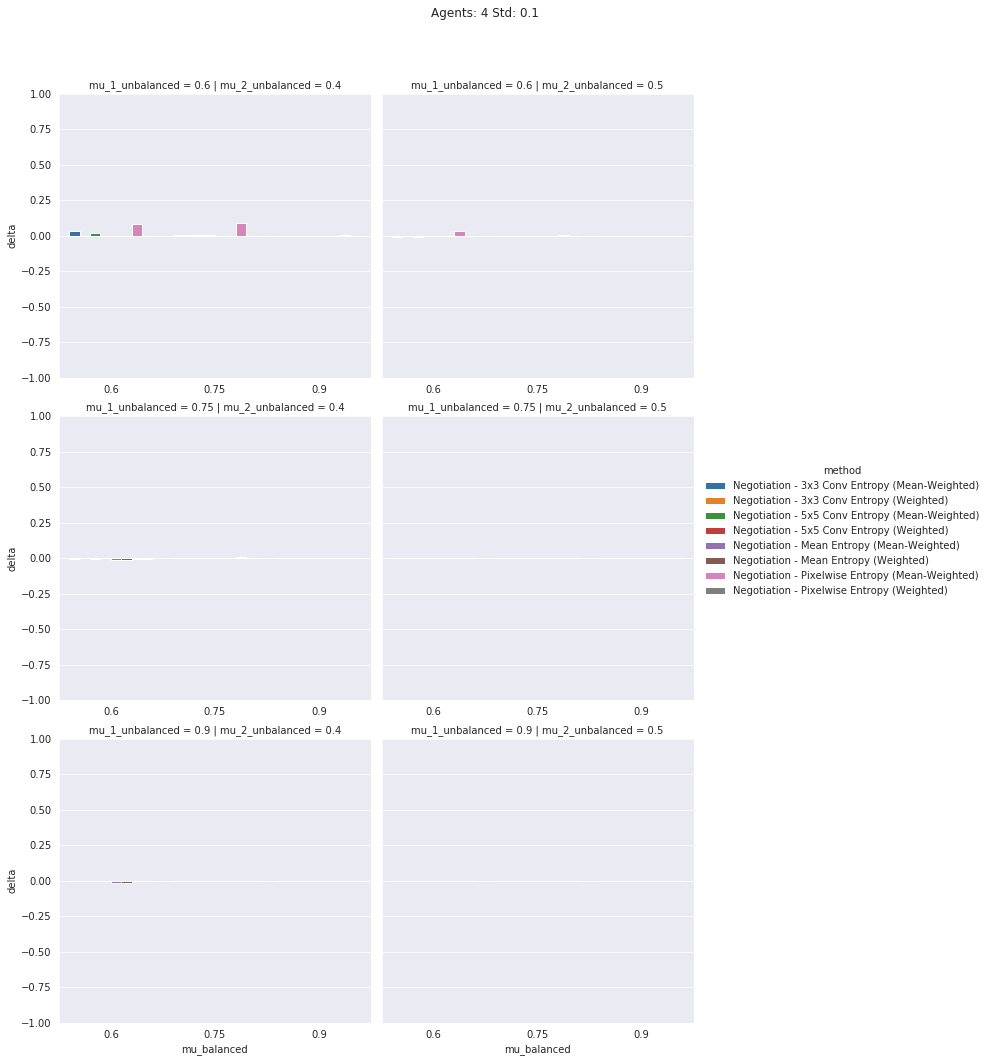

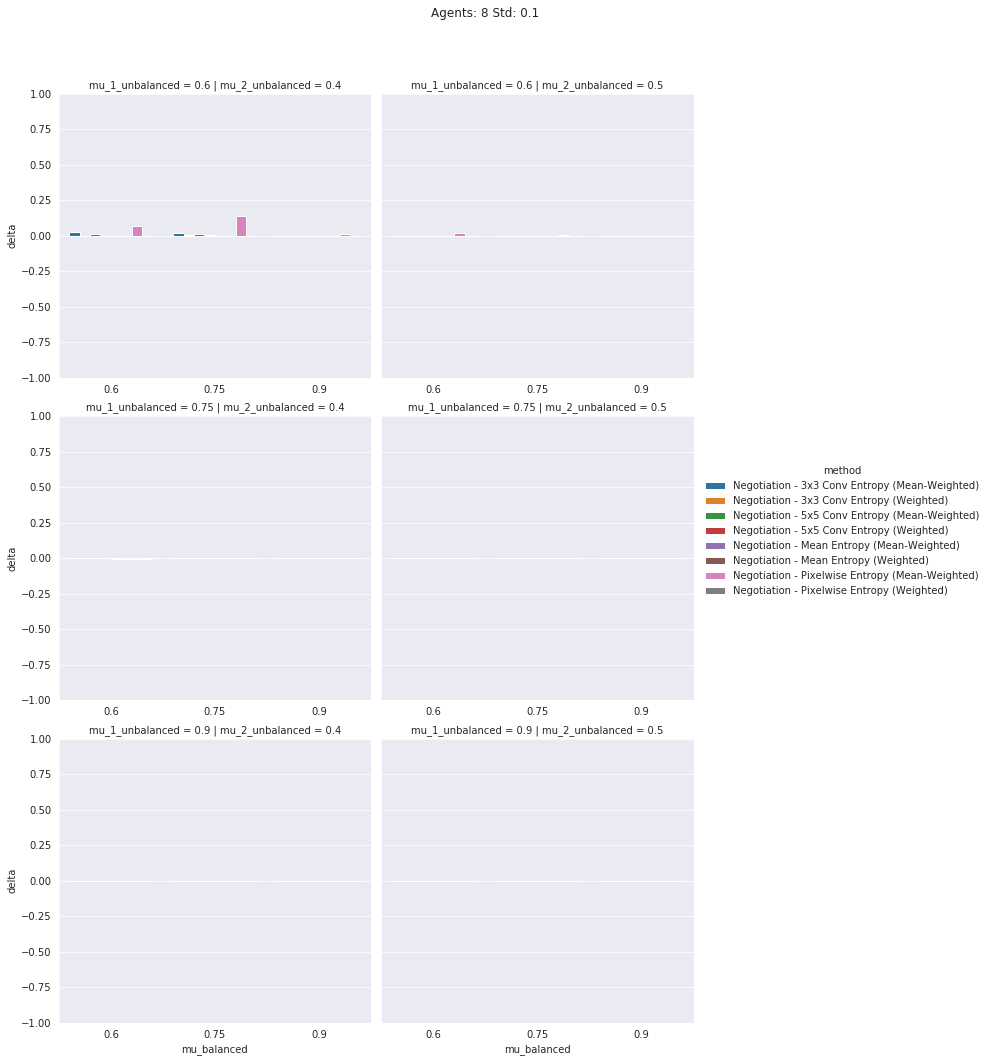

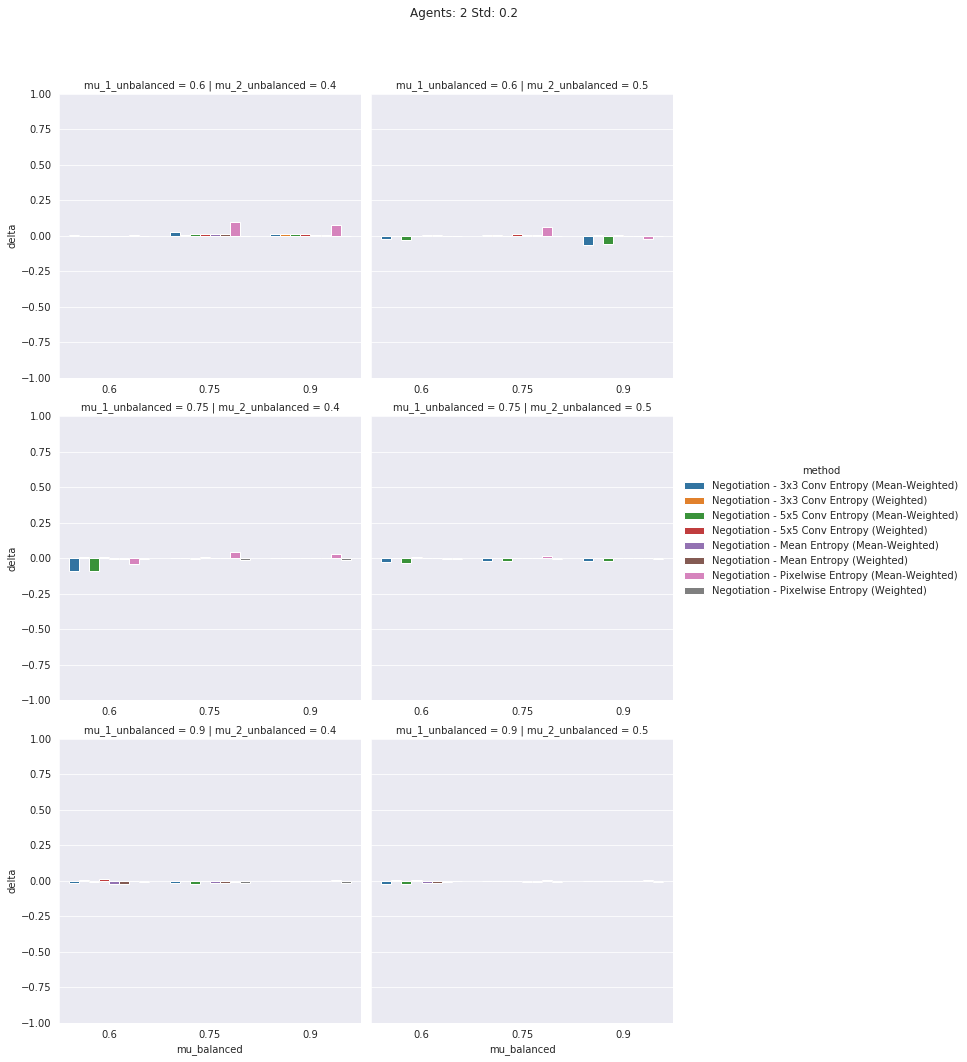

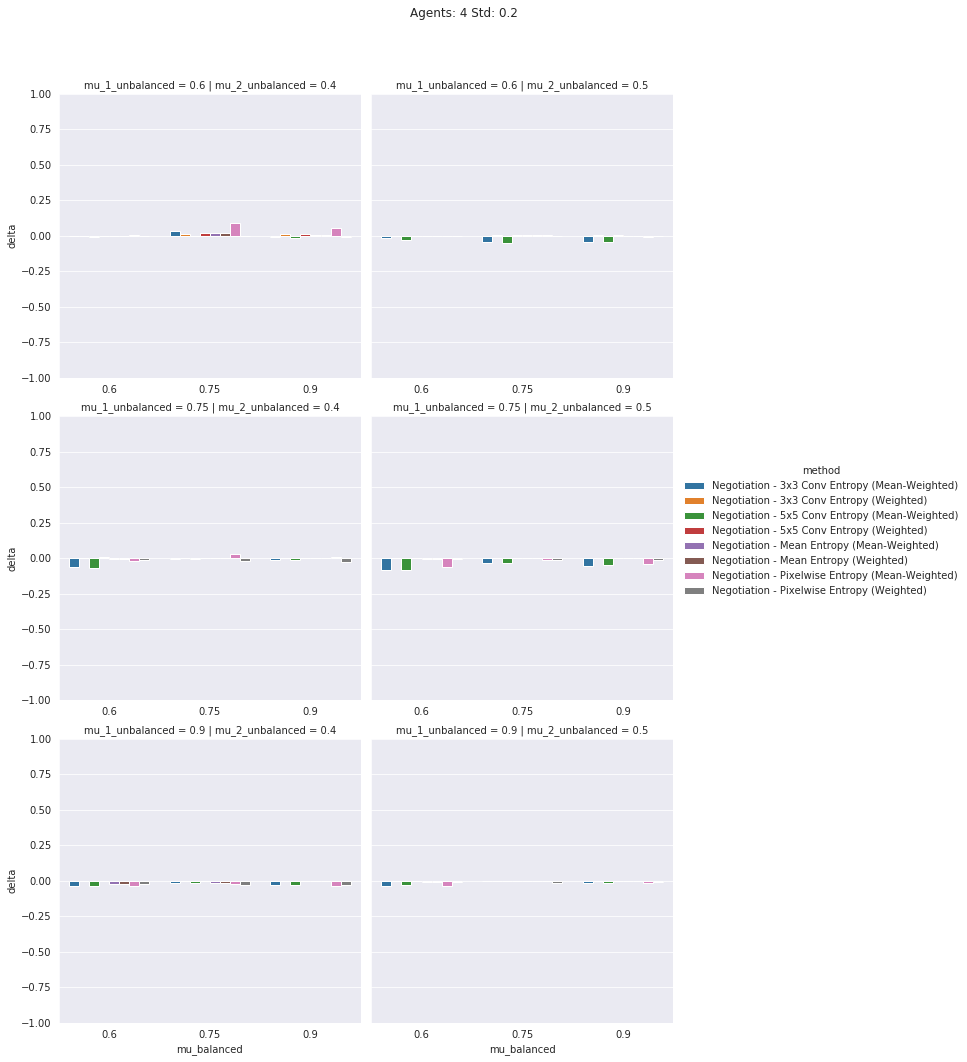

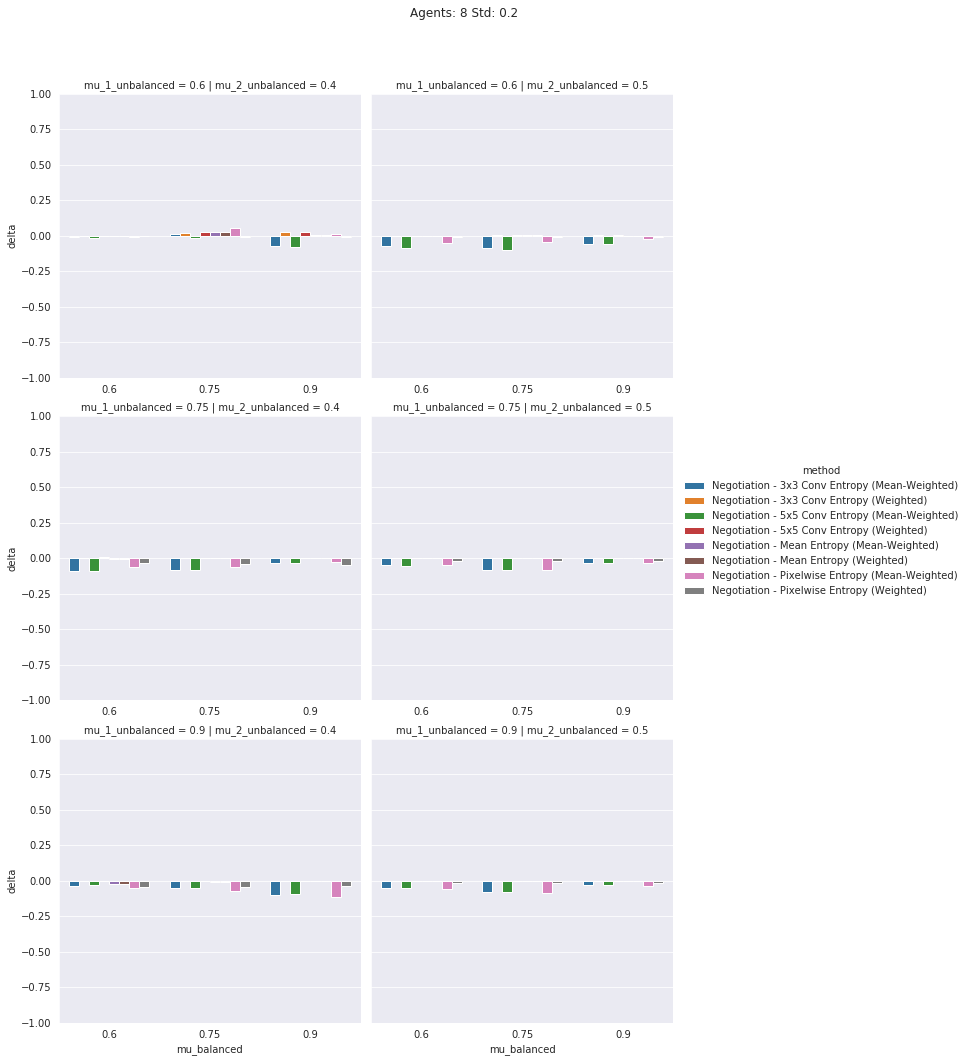

In [7]:
binary_or_multiclass = 'bin'
template = 'blob'
unbalanced_class = 'half'
data =pd.read_csv('results/{}_{}_balanced_vs_unbalanced_{}.csv'.format(binary_or_multiclass, template, unbalanced_class), index_col=0)
metric_to_show = 'weighted avg_f1-score'
data['meta_method'] = data['method'].apply(parse_aggr_method)
data['confidence_method'] = data['method'].apply(expand_confidence)
data = data[data['meta_method'].isin(['Simple Negotiation', 'Weighted Mean', 'Weighted Negotiation', 'Mean Wgh Negotiation']) ]

# Check delta wrt Weighted mean1
deltas = pd.DataFrame()
param_cols = ['mu_1_unbalanced', 'mu_2_unbalanced', 'mu_balanced', 'std', 'unbalanced_agents']
score = ['weighted avg_f1-score']
delta_wrt_to = 'Weighted Mean'
methods_to_keep = ['Mean Wgh Negotiation', 'Weighted Negotiation']
filtered = data[param_cols+score+['confidence_method', 'meta_method', 'method']]
for params, group in filtered.groupby(param_cols+['confidence_method']):
    reference_score = group[group['meta_method']==delta_wrt_to][score].iloc[0,0]
    temp = group.copy()
    temp['delta'] = group[score] - reference_score
    temp = temp[temp['meta_method'].isin(methods_to_keep)]
    deltas = deltas.append(temp, ignore_index=True)
    
sb.set_style('darkgrid')
metric_to_show='delta'
for std, filtered_std in deltas.groupby(['std']):
    for unb_ags, filtered_ags in filtered_std.groupby(['unbalanced_agents']):
        gr = sb.catplot(data=filtered_ags, x='mu_balanced', hue='method', y=metric_to_show, row='mu_1_unbalanced', col='mu_2_unbalanced', kind='bar', sharex=False)
        limits = [a.set_ylim(-1,1) for a in gr.axes.flatten()]
        #sb.relplot(data=filtered_ags, x='mu_balanced', hue='method', y=metric_to_show, row='mu_1_unbalanced', col='mu_2_unbalanced', style='meta_method', kind='line')
        plt.subplots_adjust(top=0.9)
        plt.gcf().suptitle('Agents: ' + str(unb_ags) + " Std: " + str(std))
        folder = 'results/graphs/{}/'.format(metric_to_show)
        os.makedirs(folder, exist_ok=True)
        #plt.savefig(folder + '{}_{}_balanced_vs_unbalanced_{}_std-{}_unbagents-{}.png'.format(binary_or_multiclass, template, unbalanced_class, std, unb_ags))

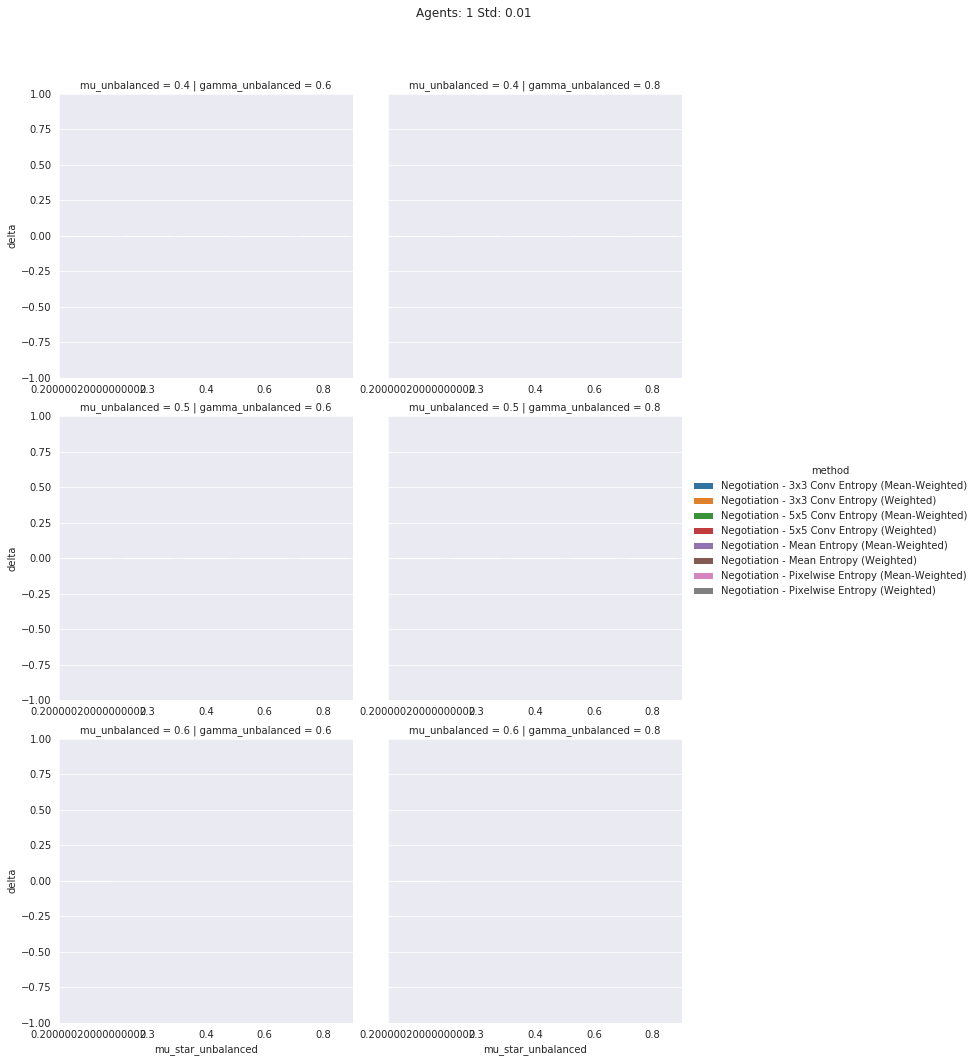

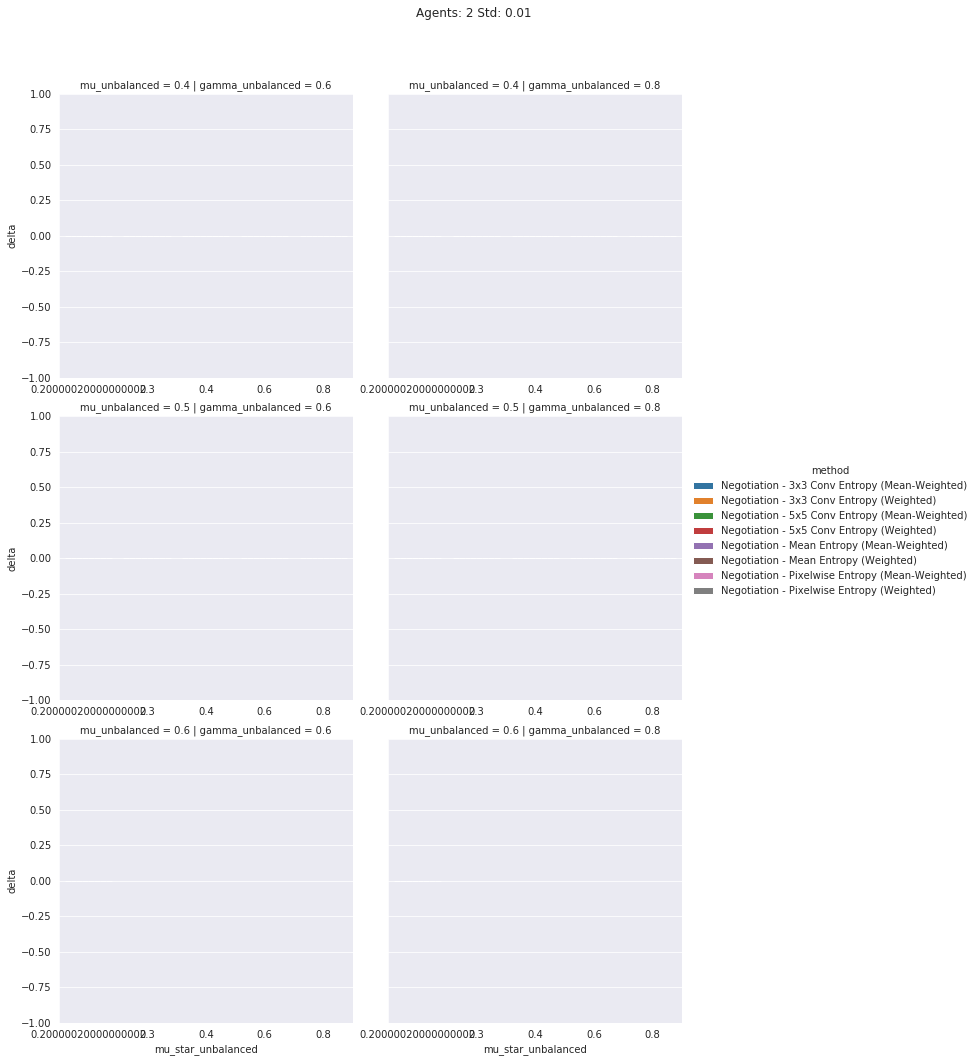

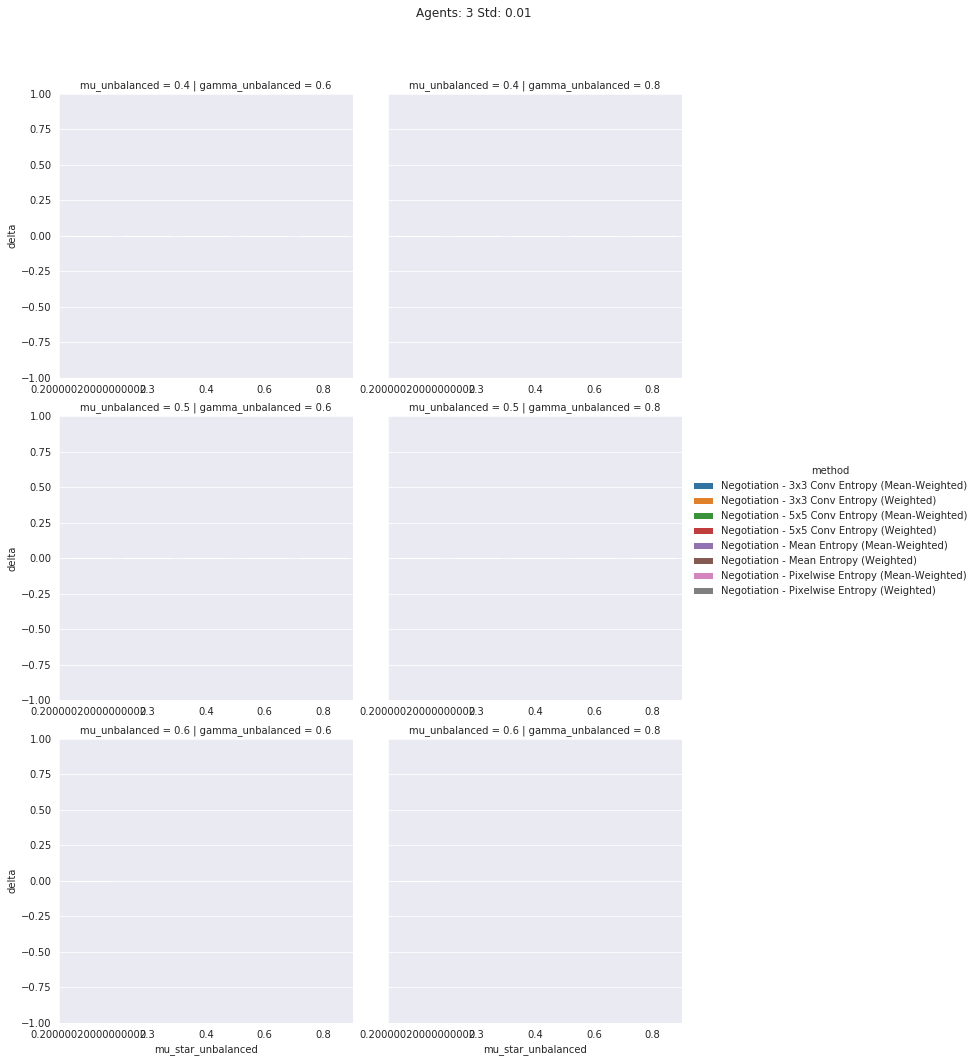

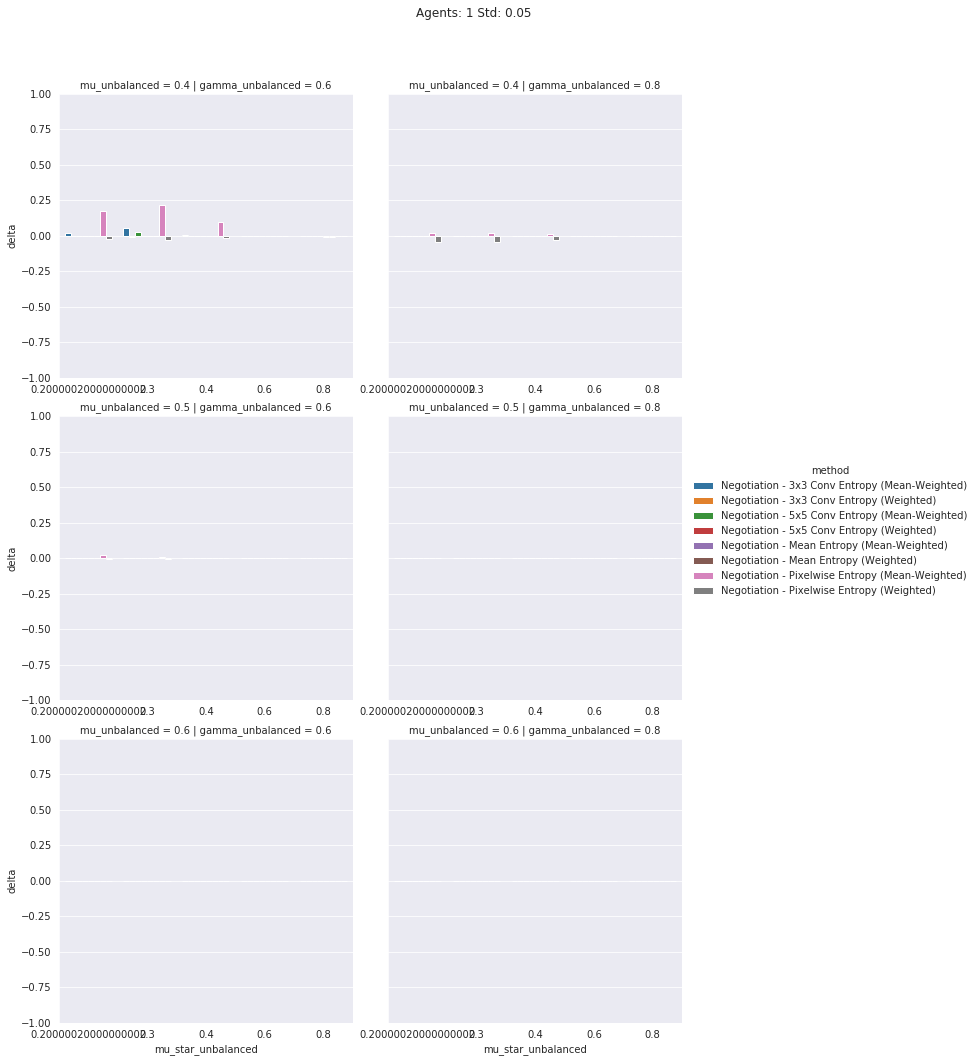

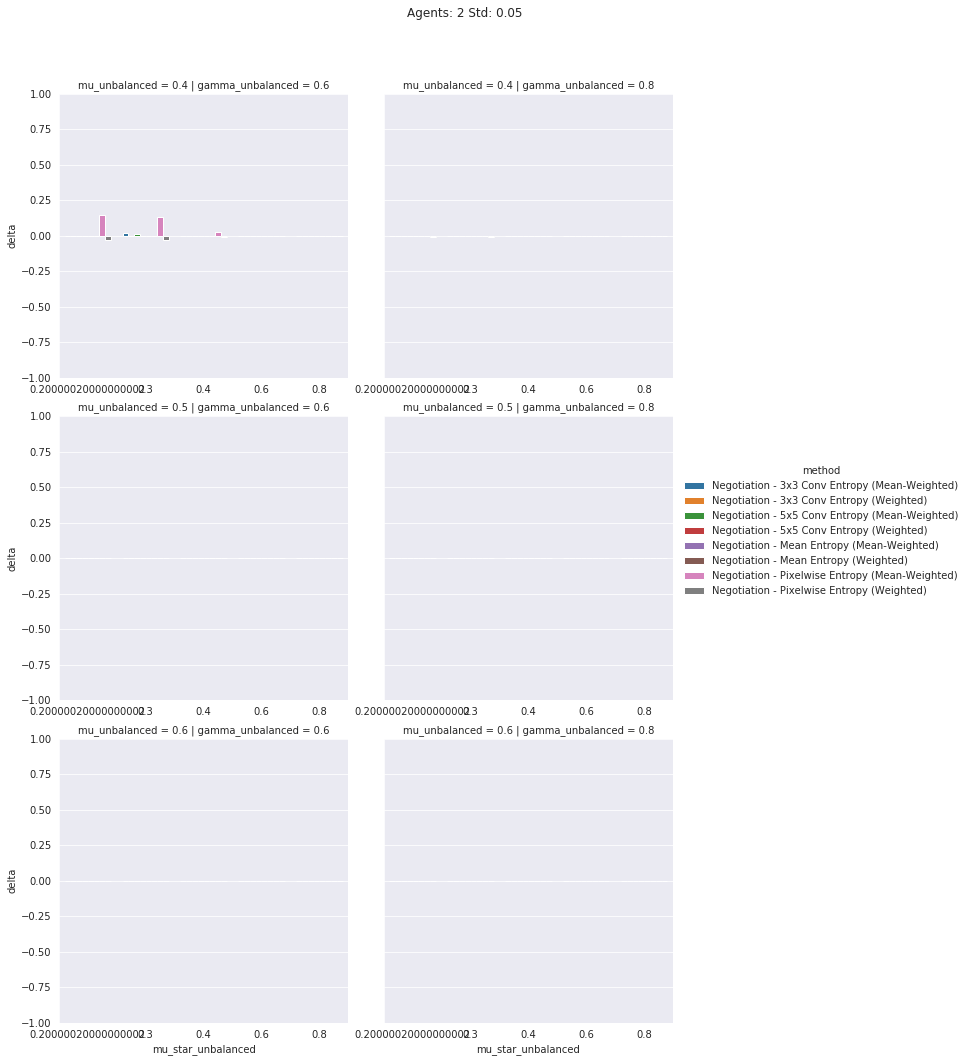

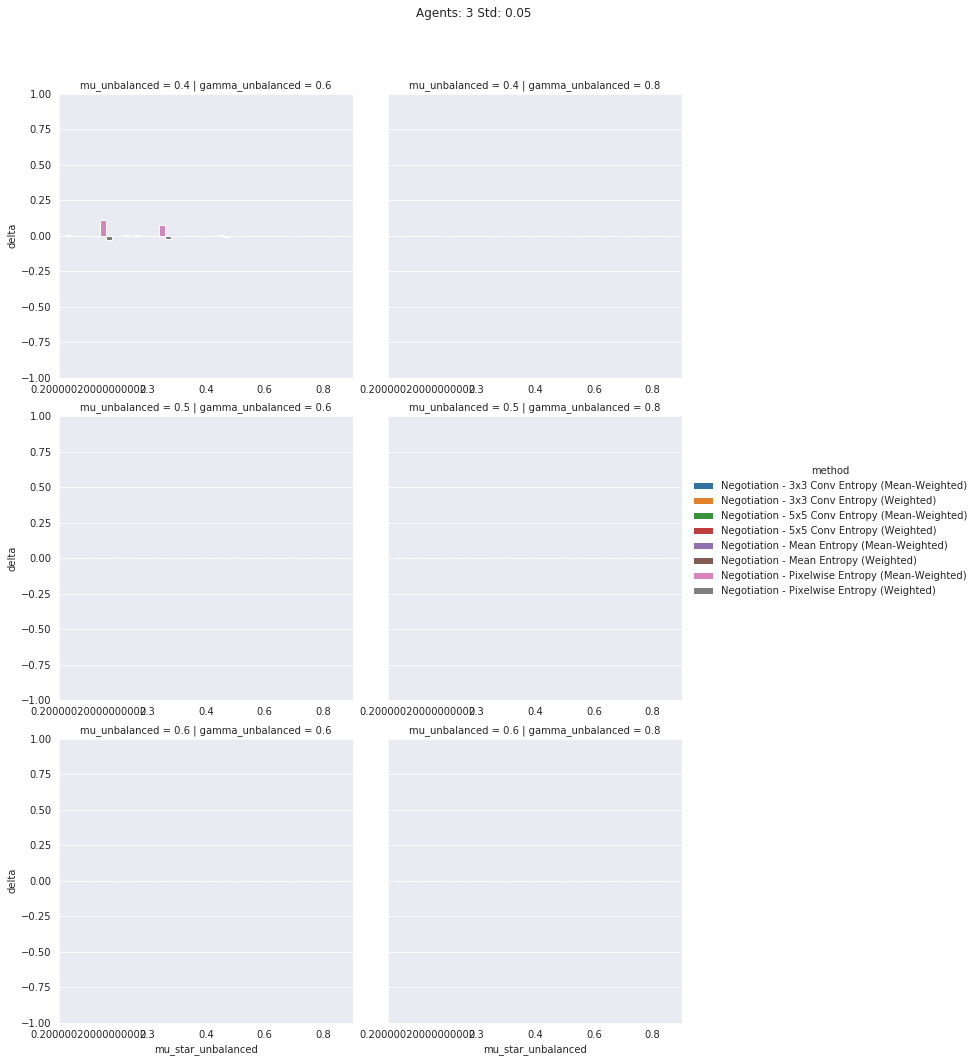

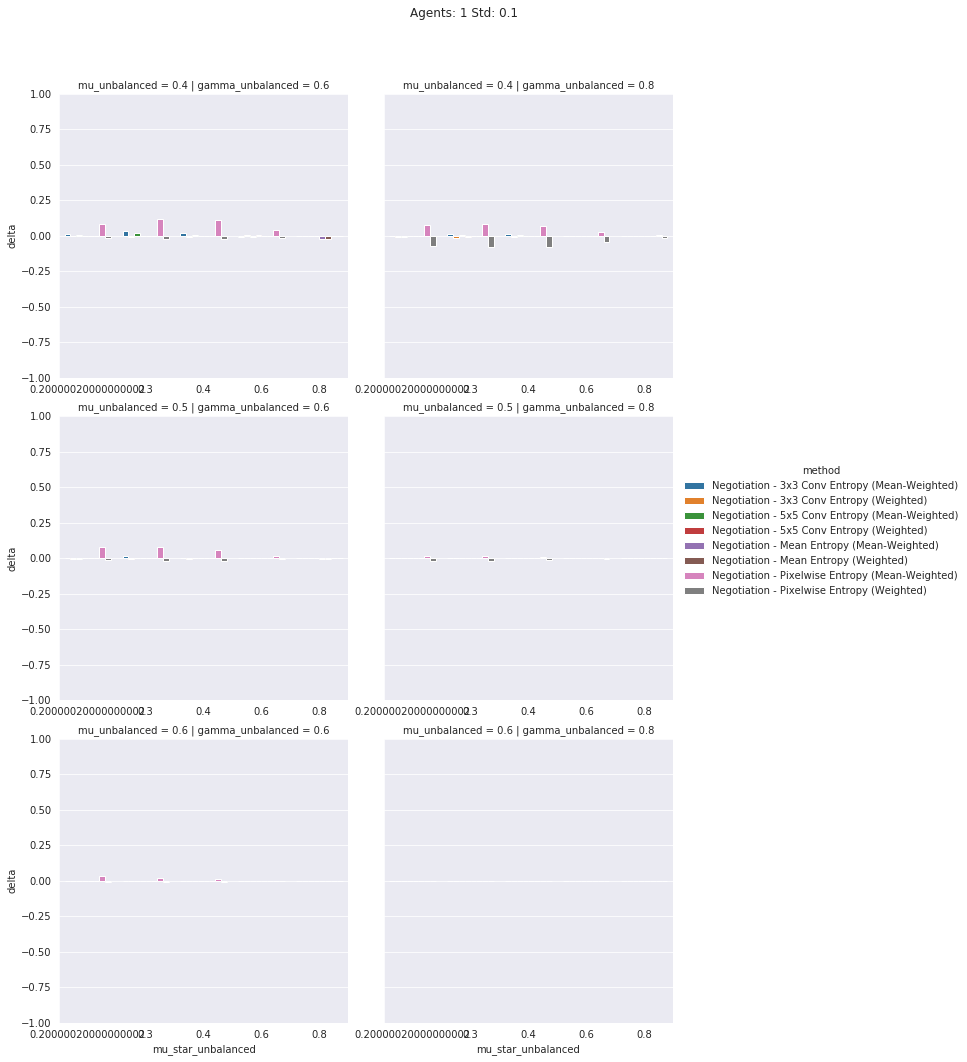

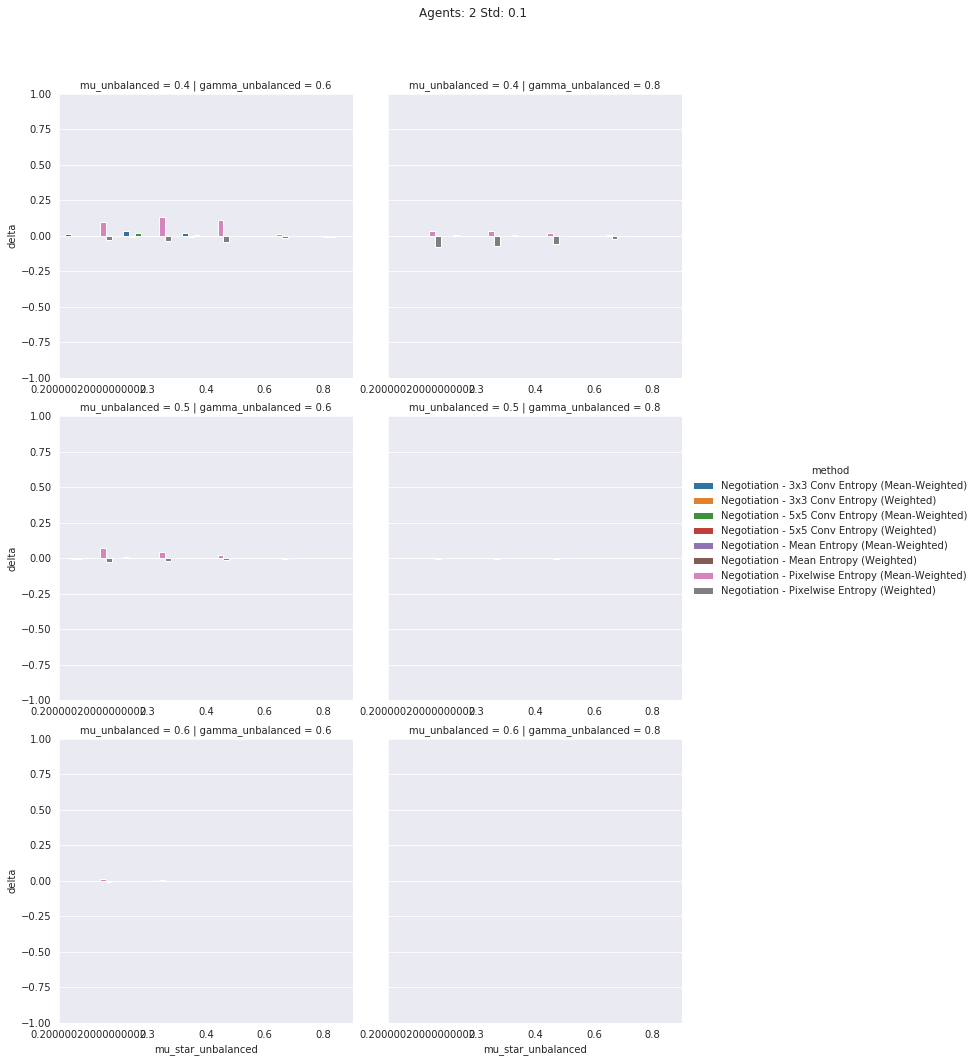

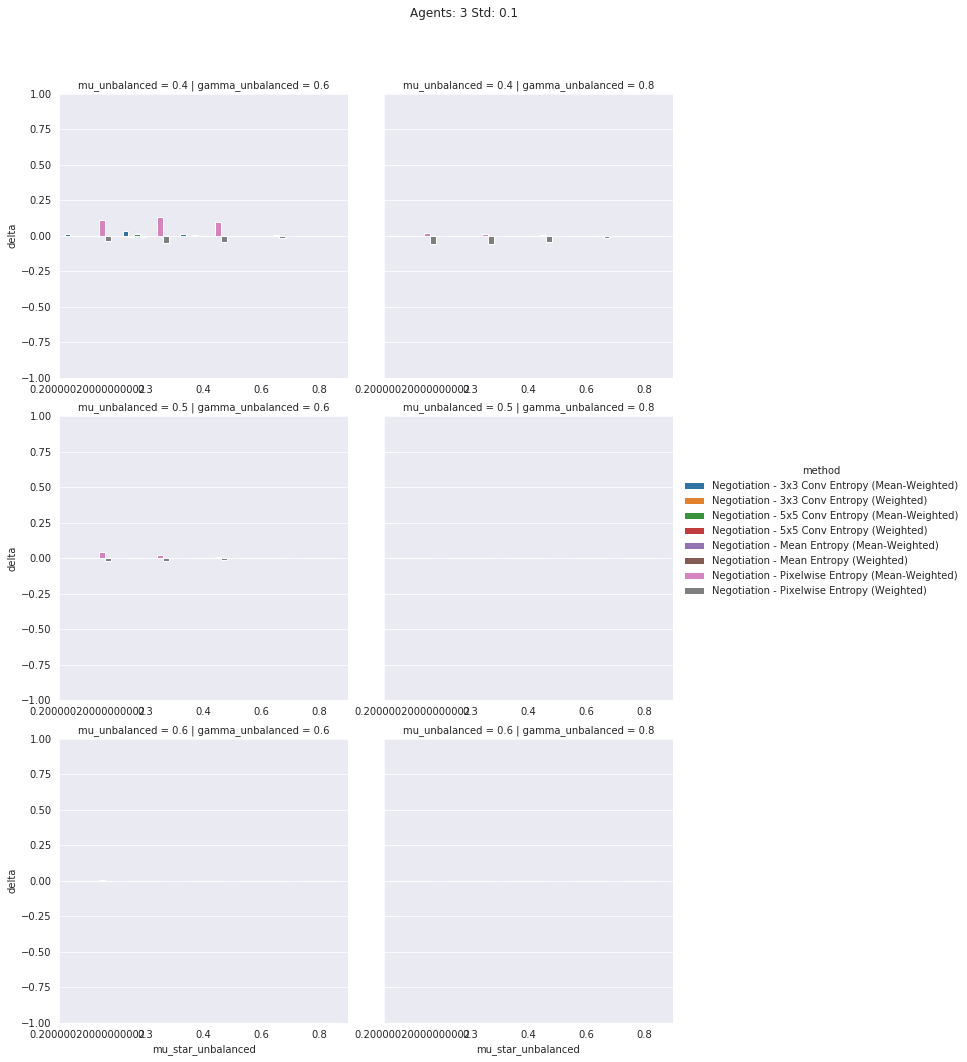

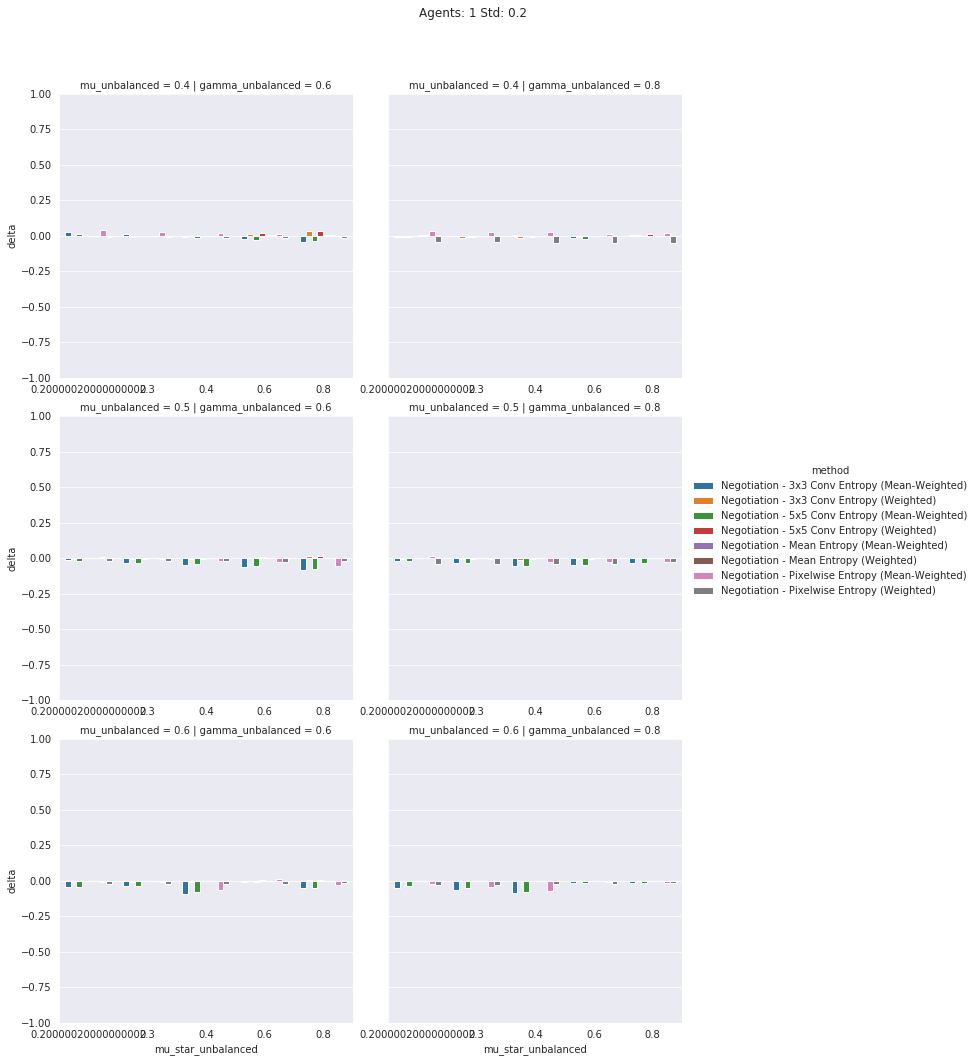

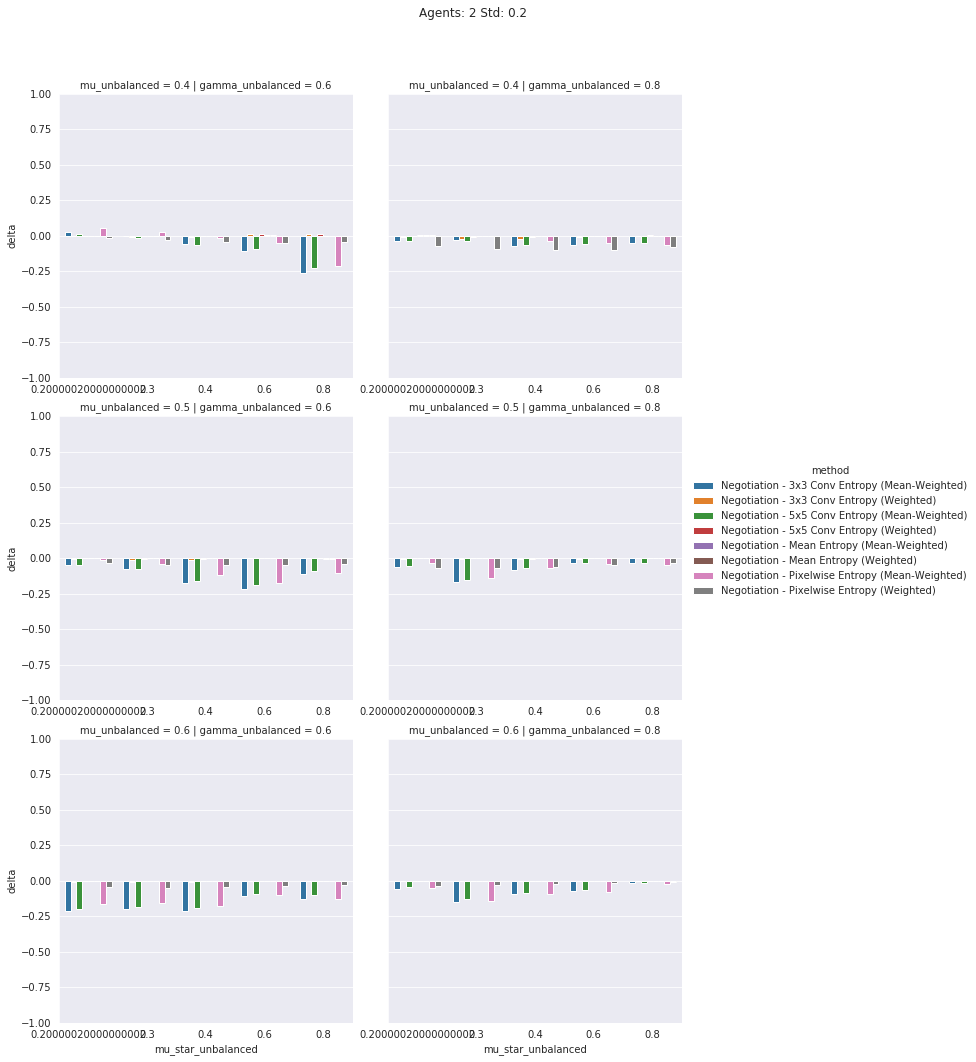

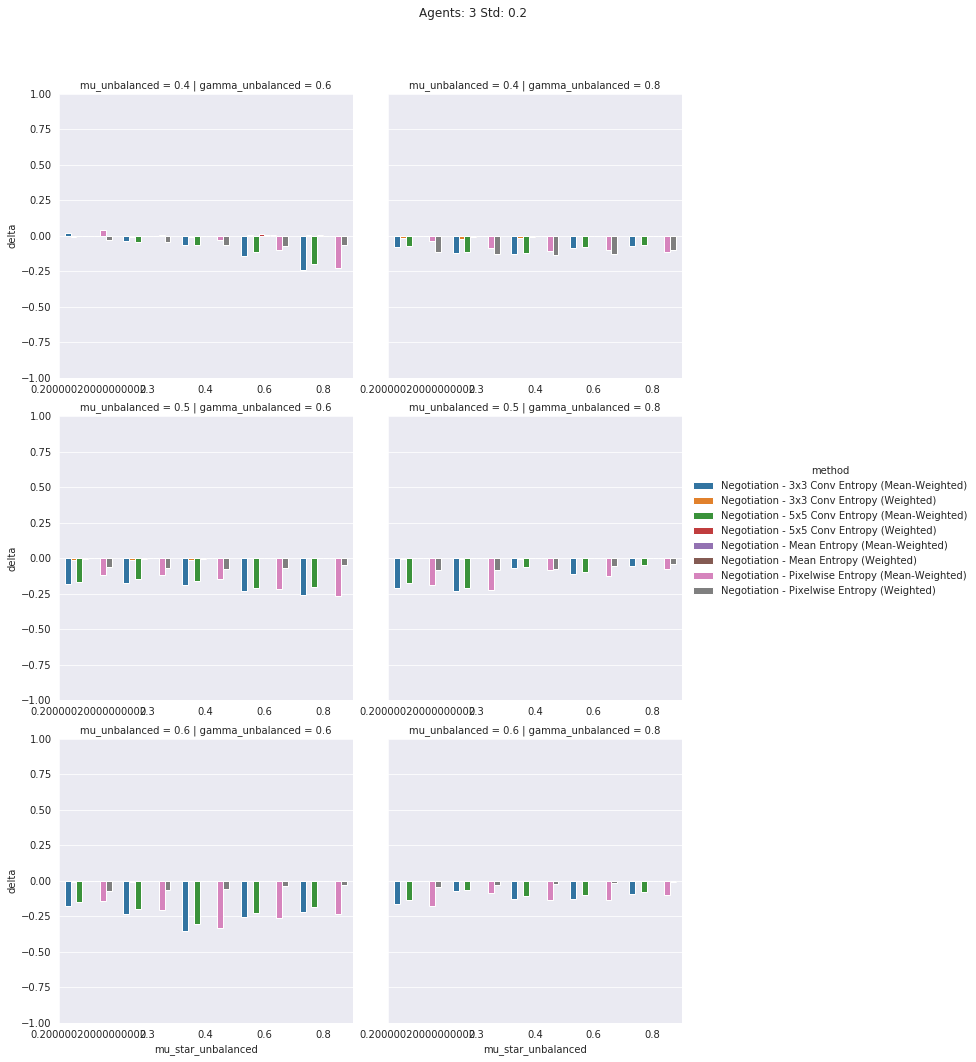

In [15]:


data =pd.read_csv('results/blobs_n_unbalanced_each_label.csv', index_col=0)
metric_to_show = 'weighted avg_f1-score'

data['meta_method'] = data['method'].apply(parse_aggr_method)
data['confidence_method'] = data['method'].apply(expand_confidence)
data = data[data['meta_method'].isin(['Simple Negotiation', 'Weighted Mean', 'Weighted Negotiation', 'Mean Wgh Negotiation']) ]

# Check delta wrt Weighted mean1
deltas = pd.DataFrame()
param_cols = ['mu_star_unbalanced', 'mu_unbalanced', 'gamma_unbalanced', 'std', 'unbalanced_agents']
score = ['weighted avg_f1-score']
delta_wrt_to = 'Weighted Mean'
methods_to_keep = ['Mean Wgh Negotiation', 'Weighted Negotiation']
filtered = data[param_cols+score+['confidence_method', 'meta_method', 'method']]
for params, group in filtered.groupby(param_cols+['confidence_method']):
    reference_score = group[group['meta_method']==delta_wrt_to][score].iloc[0,0]
    temp = group.copy()
    temp['delta'] = group[score] - reference_score
    temp = temp[temp['meta_method'].isin(methods_to_keep)]
    deltas = deltas.append(temp, ignore_index=True)
    
sb.set_style('darkgrid')
metric_to_show='delta'
for std, filtered_std in deltas.groupby(['std']):
    for unb_ags, filtered_ags in filtered_std.groupby(['unbalanced_agents']):
        gr = sb.catplot(data=filtered_ags, x='mu_star_unbalanced', hue='method', y=metric_to_show, row='mu_unbalanced', col='gamma_unbalanced', kind='bar', sharex=False)
        limits = [a.set_ylim(-1,1) for a in gr.axes.flatten()]
        #sb.relplot(data=filtered_ags, x='mu_balanced', hue='method', y=metric_to_show, row='mu_1_unbalanced', col='mu_2_unbalanced', style='meta_method', kind='line')
        plt.subplots_adjust(top=0.9)
        plt.gcf().suptitle('Agents: ' + str(unb_ags) + " Std: " + str(std))
        folder = 'results/graphs/{}/'.format(metric_to_show)
        #os.makedirs(folder, exist_ok=True)
        #plt.savefig(folder + '{}_{}_balanced_vs_unbalanced_{}_std-{}_unbagents-{}.png'.format(binary_or_multiclass, template, unbalanced_class, std, unb_ags))

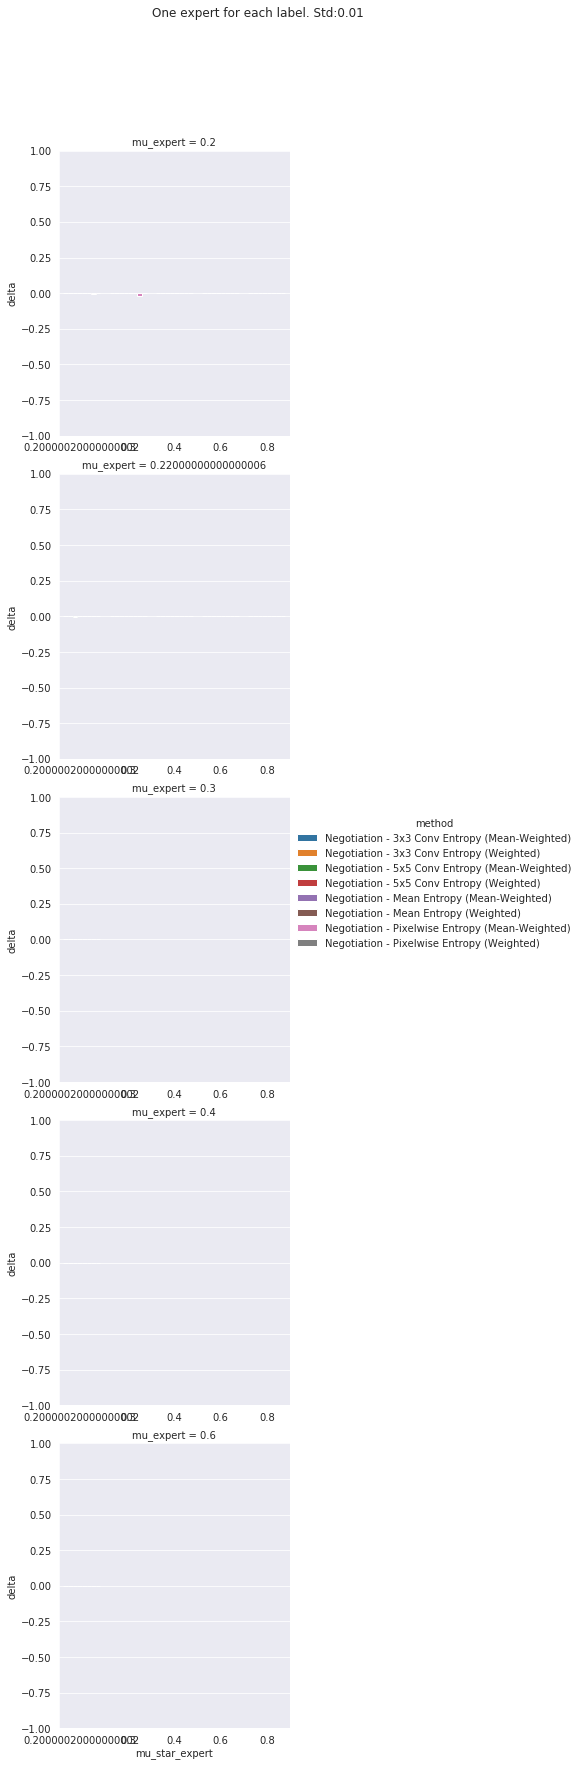

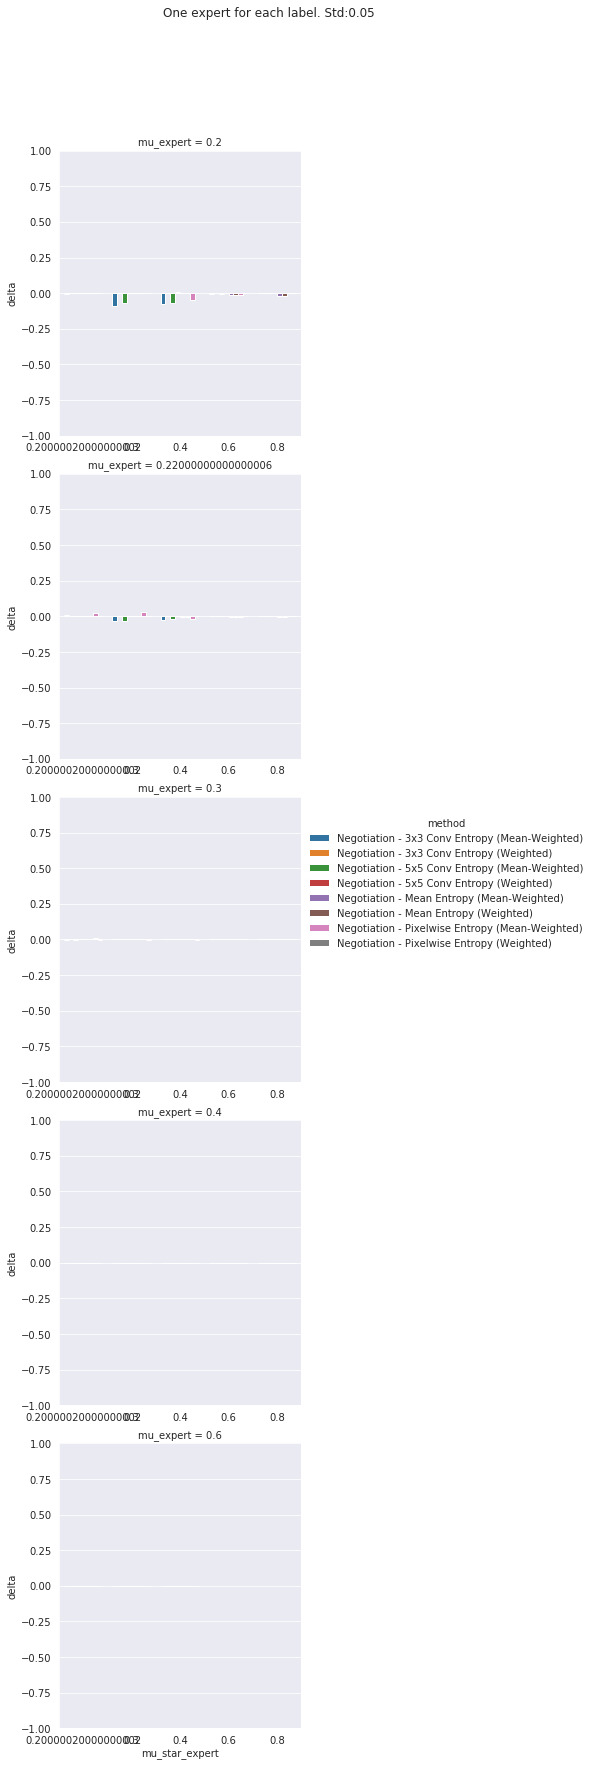

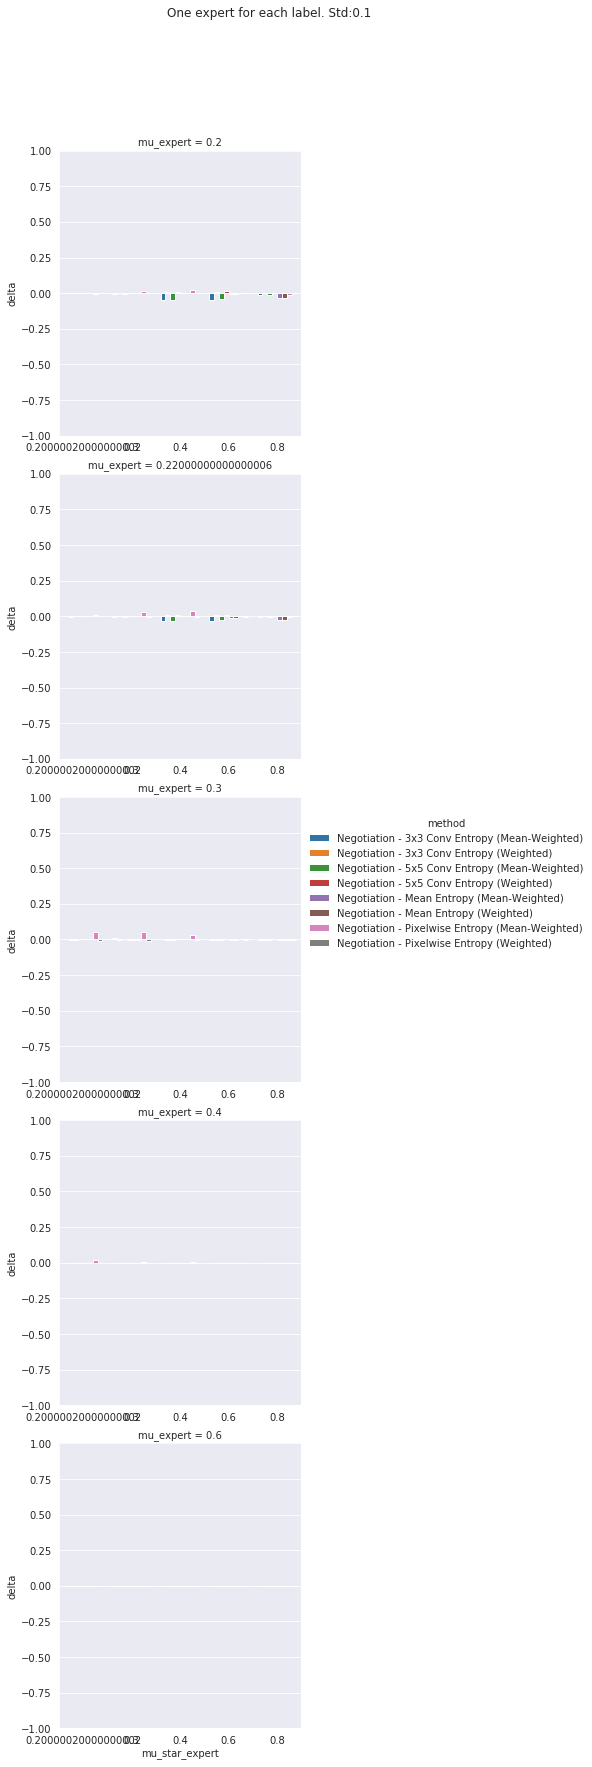

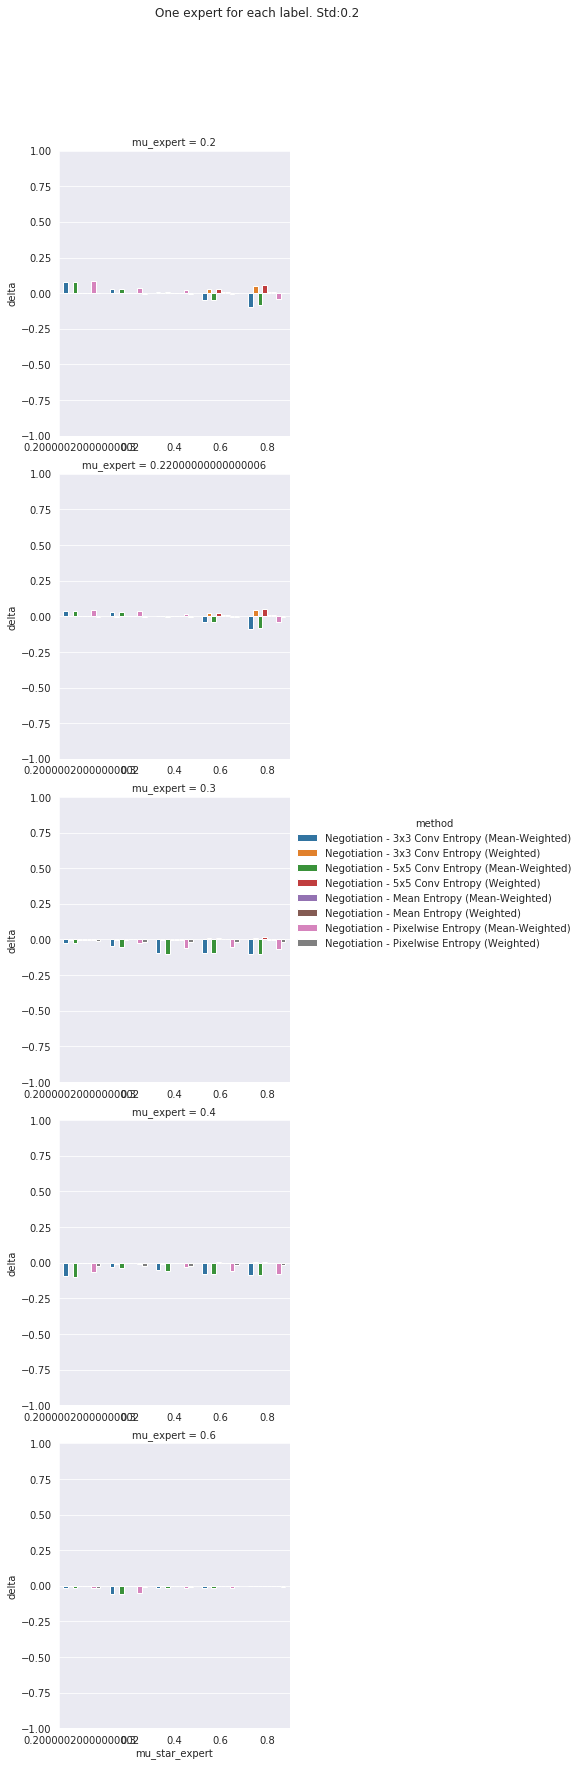

In [16]:
data =pd.read_csv('results/blobs_one_expert_each_label.csv', index_col=0)
data.columns
metric_to_show = 'weighted avg_f1-score'

data['meta_method'] = data['method'].apply(parse_aggr_method)
data['confidence_method'] = data['method'].apply(expand_confidence)
data = data[data['meta_method'].isin(['Simple Negotiation', 'Weighted Mean', 'Weighted Negotiation', 'Mean Wgh Negotiation']) ]

# Check delta wrt Weighted mean1
deltas = pd.DataFrame()
param_cols = ['mu_star_expert', 'mu_expert', 'std']
score = ['weighted avg_f1-score']
delta_wrt_to = 'Weighted Mean'
methods_to_keep = ['Mean Wgh Negotiation', 'Weighted Negotiation']
filtered = data[param_cols+score+['confidence_method', 'meta_method', 'method']]
for params, group in filtered.groupby(param_cols+['confidence_method']):
    reference_score = group[group['meta_method']==delta_wrt_to][score].iloc[0,0]
    temp = group.copy()
    temp['delta'] = group[score] - reference_score
    temp = temp[temp['meta_method'].isin(methods_to_keep)]
    deltas = deltas.append(temp, ignore_index=True)
    
sb.set_style('darkgrid')
metric_to_show='delta'
for std, filtered_std in deltas.groupby(['std']):
    gr = sb.catplot(data=filtered_std, x='mu_star_expert', hue='method', y=metric_to_show, row='mu_expert', kind='bar', sharex=False)
    limits = [a.set_ylim(-1,1) for a in gr.axes.flatten()]
    #sb.relplot(data=filtered_ags, x='mu_balanced', hue='method', y=metric_to_show, row='mu_1_unbalanced', col='mu_2_unbalanced', style='meta_method', kind='line')
    plt.subplots_adjust(top=0.9)
    plt.gcf().suptitle('One expert for each label. Std:' + str(std))
    folder = 'results/graphs/{}/'.format(metric_to_show)
    #os.makedirs(folder, exist_ok=True)
    #plt.savefig(folder + '{}_{}_balanced_vs_unbalanced_{}_std-{}_unbagents-{}.png'.format(binary_or_multiclass, template, unbalanced_class, std, unb_ags))

In [17]:
data =pd.read_csv('results/chk_one_expert_vs_N_unbalanced.csv', index_col=0)
metric_to_show = 'weighted avg_f1-score'

data['meta_method'] = data['method'].apply(parse_aggr_method)
data['confidence_method'] = data['method'].apply(expand_confidence)
data = data[data['meta_method'].isin(['Simple Negotiation', 'Weighted Mean', 'Weighted Negotiation', 'Mean Wgh Negotiation']) ]


# Check delta wrt Weighted mean1
deltas = pd.DataFrame()
param_cols = ['mu_expert', 'mu_star_expert', 'mu_star_unbalanced', 'mu_unbalanced', 'std', 'unbalanced_agents']
score = ['weighted avg_f1-score']
delta_wrt_to = 'Weighted Mean'
methods_to_keep = ['Mean Wgh Negotiation', 'Weighted Negotiation']
filtered = data[param_cols+score+['confidence_method', 'meta_method', 'method']]
for params, group in filtered.groupby(param_cols+['confidence_method']):
    reference_score = group[group['meta_method']==delta_wrt_to][score].iloc[0,0]
    temp = group.copy()
    temp['delta'] = group[score] - reference_score
    temp = temp[temp['meta_method'].isin(methods_to_keep)]
    deltas = deltas.append(temp, ignore_index=True)
    
sb.set_style('darkgrid')
metric_to_show='delta'
for std, filtered_std in deltas.groupby(['std']):
    for unb_ags, filtered_ags in filtered_std.groupby(['unbalanced_agents']):
        gr = sb.catplot(data=filtered_ags, x='mu_star_unbalanced', hue='method', y=metric_to_show, row='mu_unbalanced', col='gamma_unbalanced', kind='bar', sharex=False)
        limits = [a.set_ylim(-1,1) for a in gr.axes.flatten()]
        #sb.relplot(data=filtered_ags, x='mu_balanced', hue='method', y=metric_to_show, row='mu_1_unbalanced', col='mu_2_unbalanced', style='meta_method', kind='line')
        plt.subplots_adjust(top=0.9)
        plt.gcf().suptitle('Agents: ' + str(unb_ags) + " Std: " + str(std))
        folder = 'results/graphs/{}/'.format(metric_to_show)
        #os.makedirs(folder, exist_ok=True)
        #plt.savefig(folder + '{}_{}_balanced_vs_unbalanced_{}_std-{}_unbagents-{}.png'.format(binary_or_multiclass, template, unbalanced_class, std, unb_ags))

In [18]:
data.columns

Index(['Label 0_f1-score', 'Label 0_precision', 'Label 0_recall',
       'Label 0_support', 'Label 1_f1-score', 'Label 1_precision',
       'Label 1_recall', 'Label 1_support', 'Label 2_f1-score',
       'Label 2_precision', 'Label 2_recall', 'Label 2_support',
       'Label 3_f1-score', 'Label 3_precision', 'Label 3_recall',
       'Label 3_support', 'accuracy', 'gamma_unbalanced', 'macro avg_f1-score',
       'macro avg_precision', 'macro avg_recall', 'macro avg_support',
       'method', 'micro avg_f1-score', 'micro avg_precision',
       'micro avg_recall', 'micro avg_support', 'mu_expert', 'mu_star_expert',
       'mu_star_unbalanced', 'mu_unbalanced', 'non_consensus_px', 'std',
       'unbalanced_agents', 'weighted avg_f1-score', 'weighted avg_precision',
       'weighted avg_recall', 'weighted avg_support'],
      dtype='object')